In [1]:
# Import libraries

In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data

In [4]:
df = pd.read_csv('forestfires.csv')
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [5]:
# EDA

In [6]:
df.shape

(517, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [9]:
df.describe(include = 'O')

month  day size_category
count    517  517           517
unique    12    7             2
top      aug  sun         small
freq     184   95           378

In [10]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [20]:
df[df.duplicated(keep = False)]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
52    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
99    aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
214   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
302   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
425   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
460   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
500   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
507   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   

    size_category  
52          small  
53          small  
99          small  
100         small  
214         large  
215         large  
302         small  
303         small  
425         small  
426         small  
460         small  
461         small  
500         small  
501         small  
507         small  
508         small

In [21]:
df.drop_duplicates(keep = 'first', inplace = True)

In [22]:
# Checking min aand max values

In [23]:
df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']].agg(['min','max'])

FFMC    DMC     DC   ISI  temp   RH  wind  rain     area
min  18.7    1.1    7.9   0.0   2.2   15   0.4   0.0     0.00
max  96.2  291.3  860.6  56.1  33.3  100   9.4   6.4  1090.84

In [24]:
# Data visualization

In [25]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

Text(0.5, 1.0, 'Boxplot')

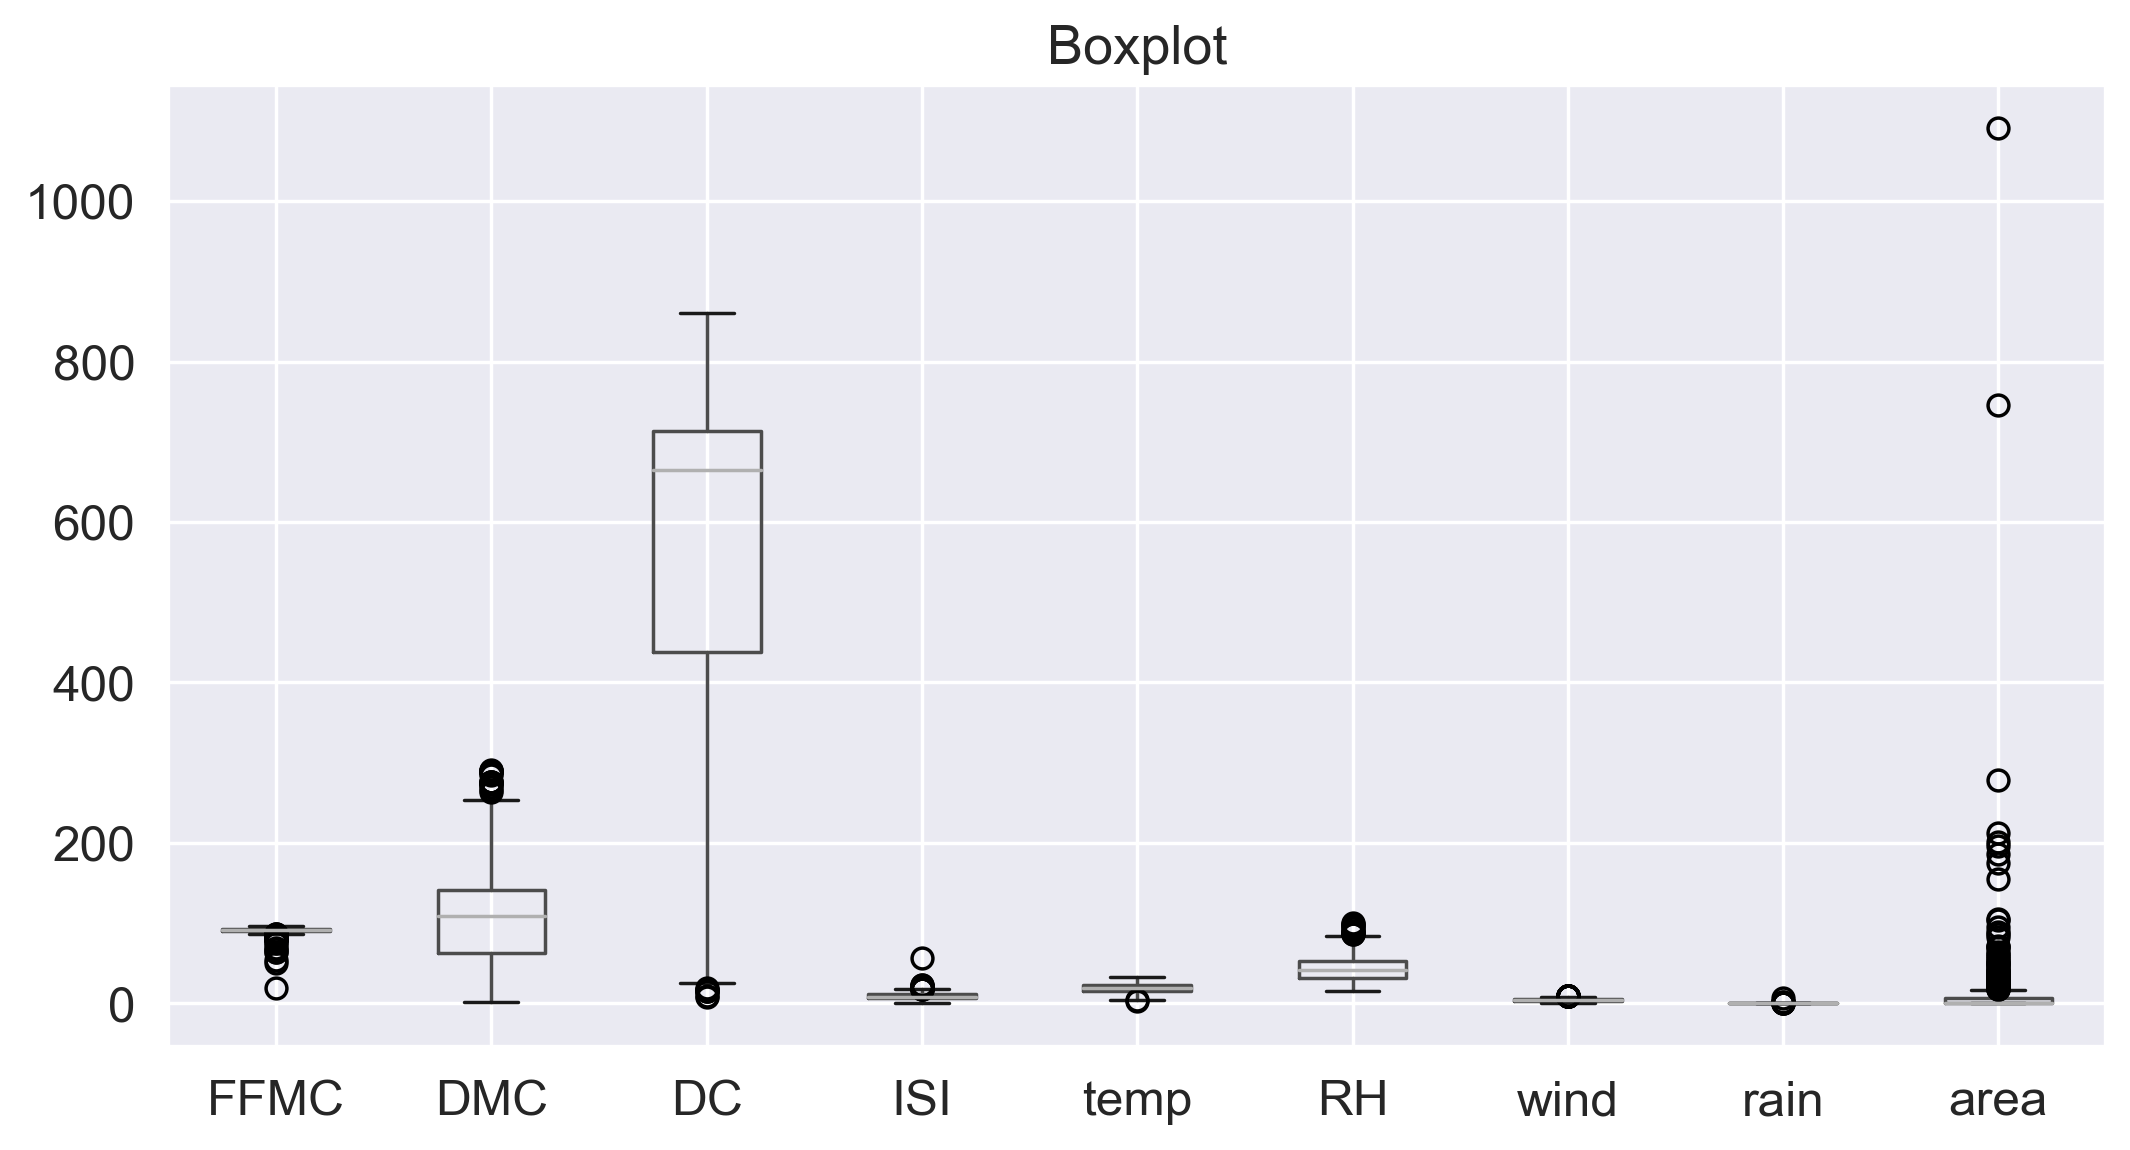

In [26]:
df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].boxplot()
plt.title('Boxplot')

Text(0.5, 1.0, 'FFMC')

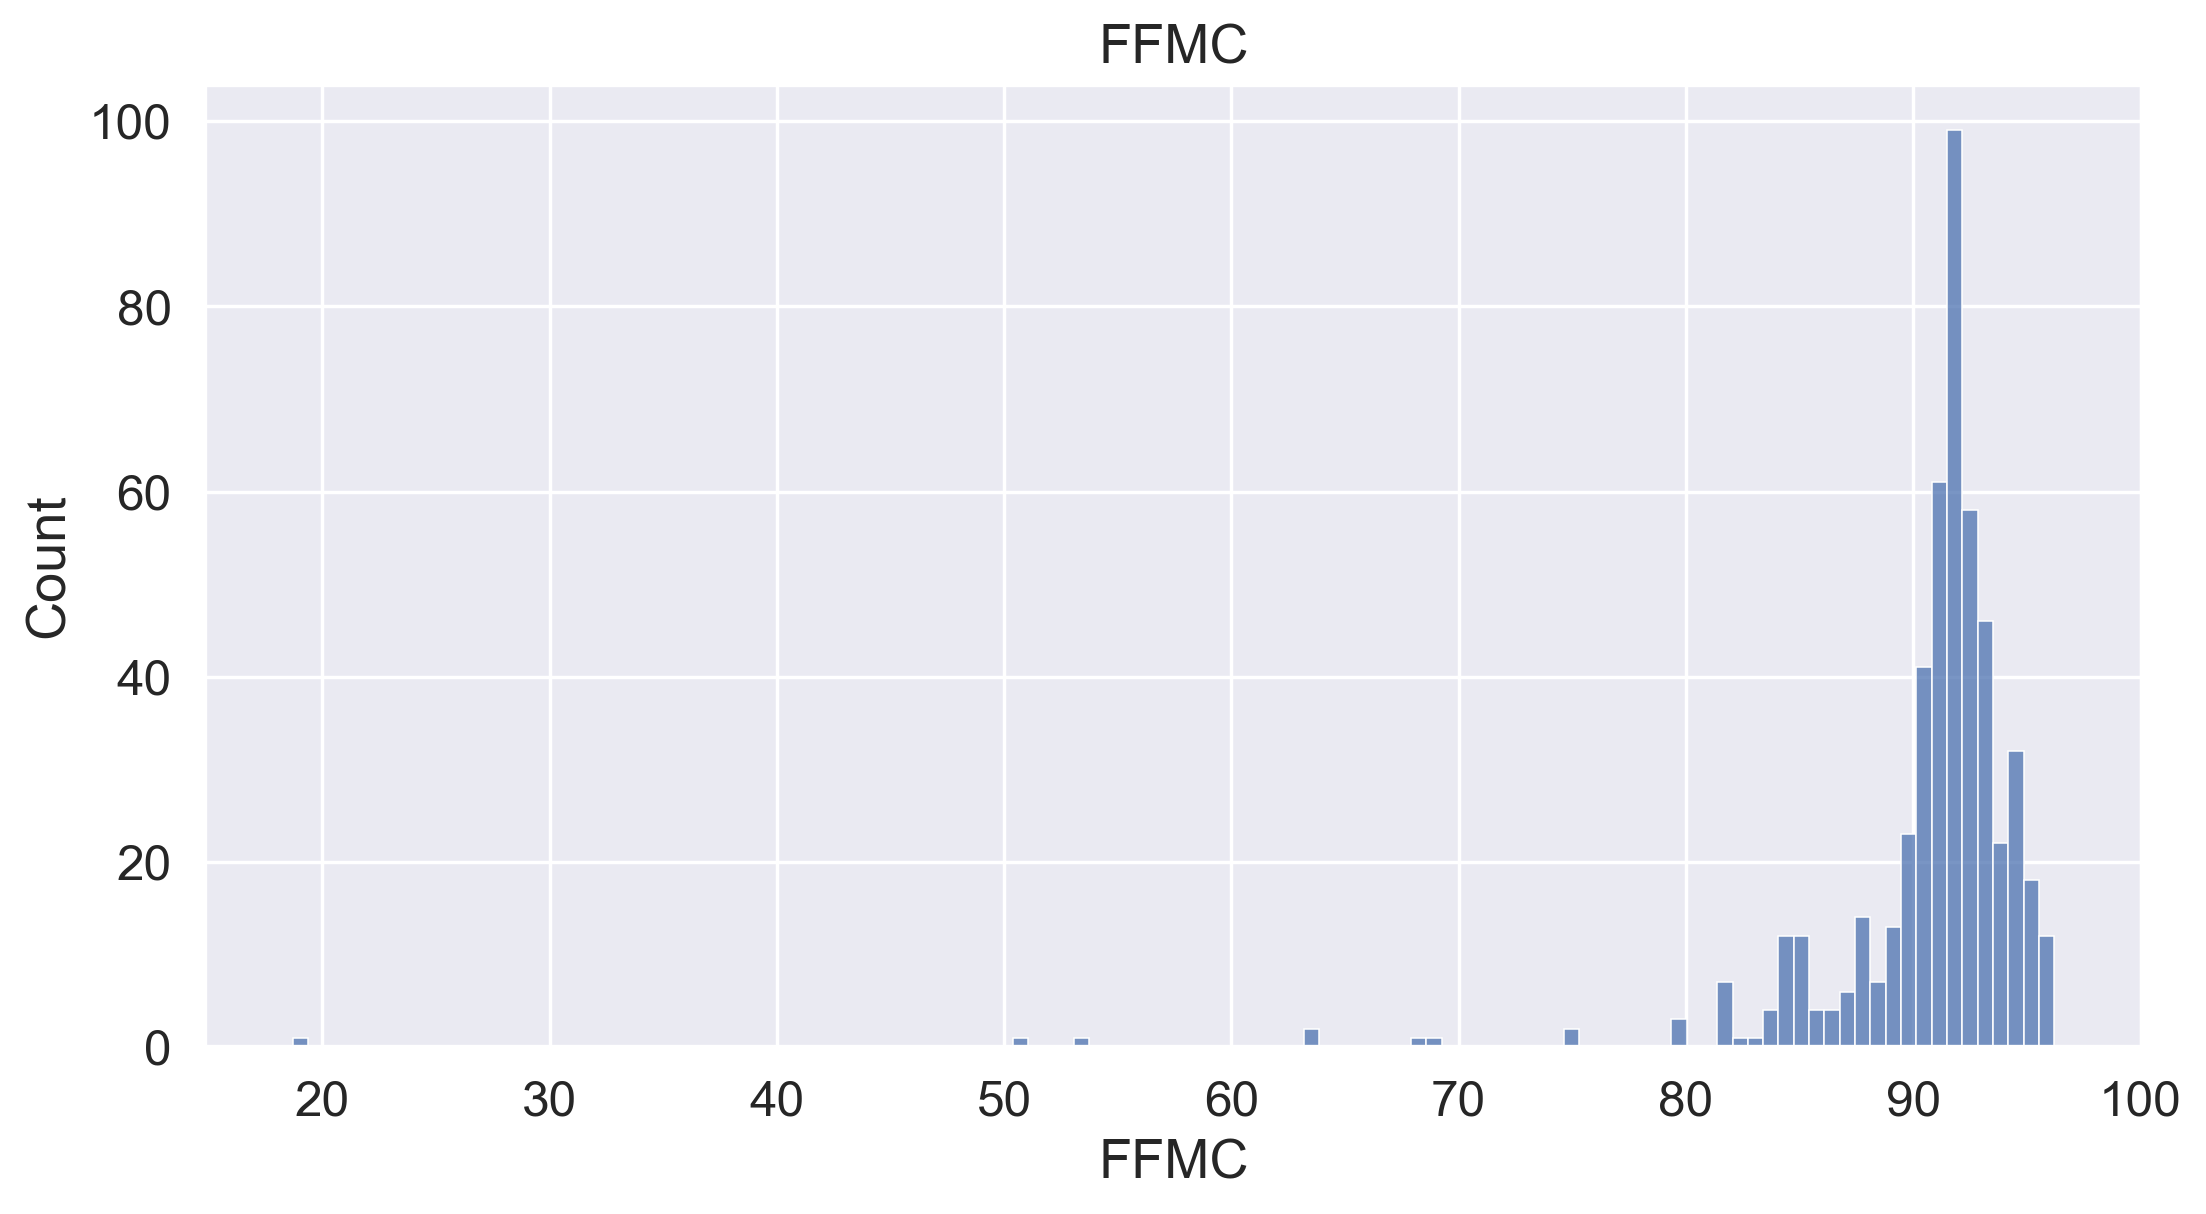

In [27]:
sns.histplot(df['FFMC'])
plt.title('FFMC')

Text(0.5, 1.0, 'DMC')

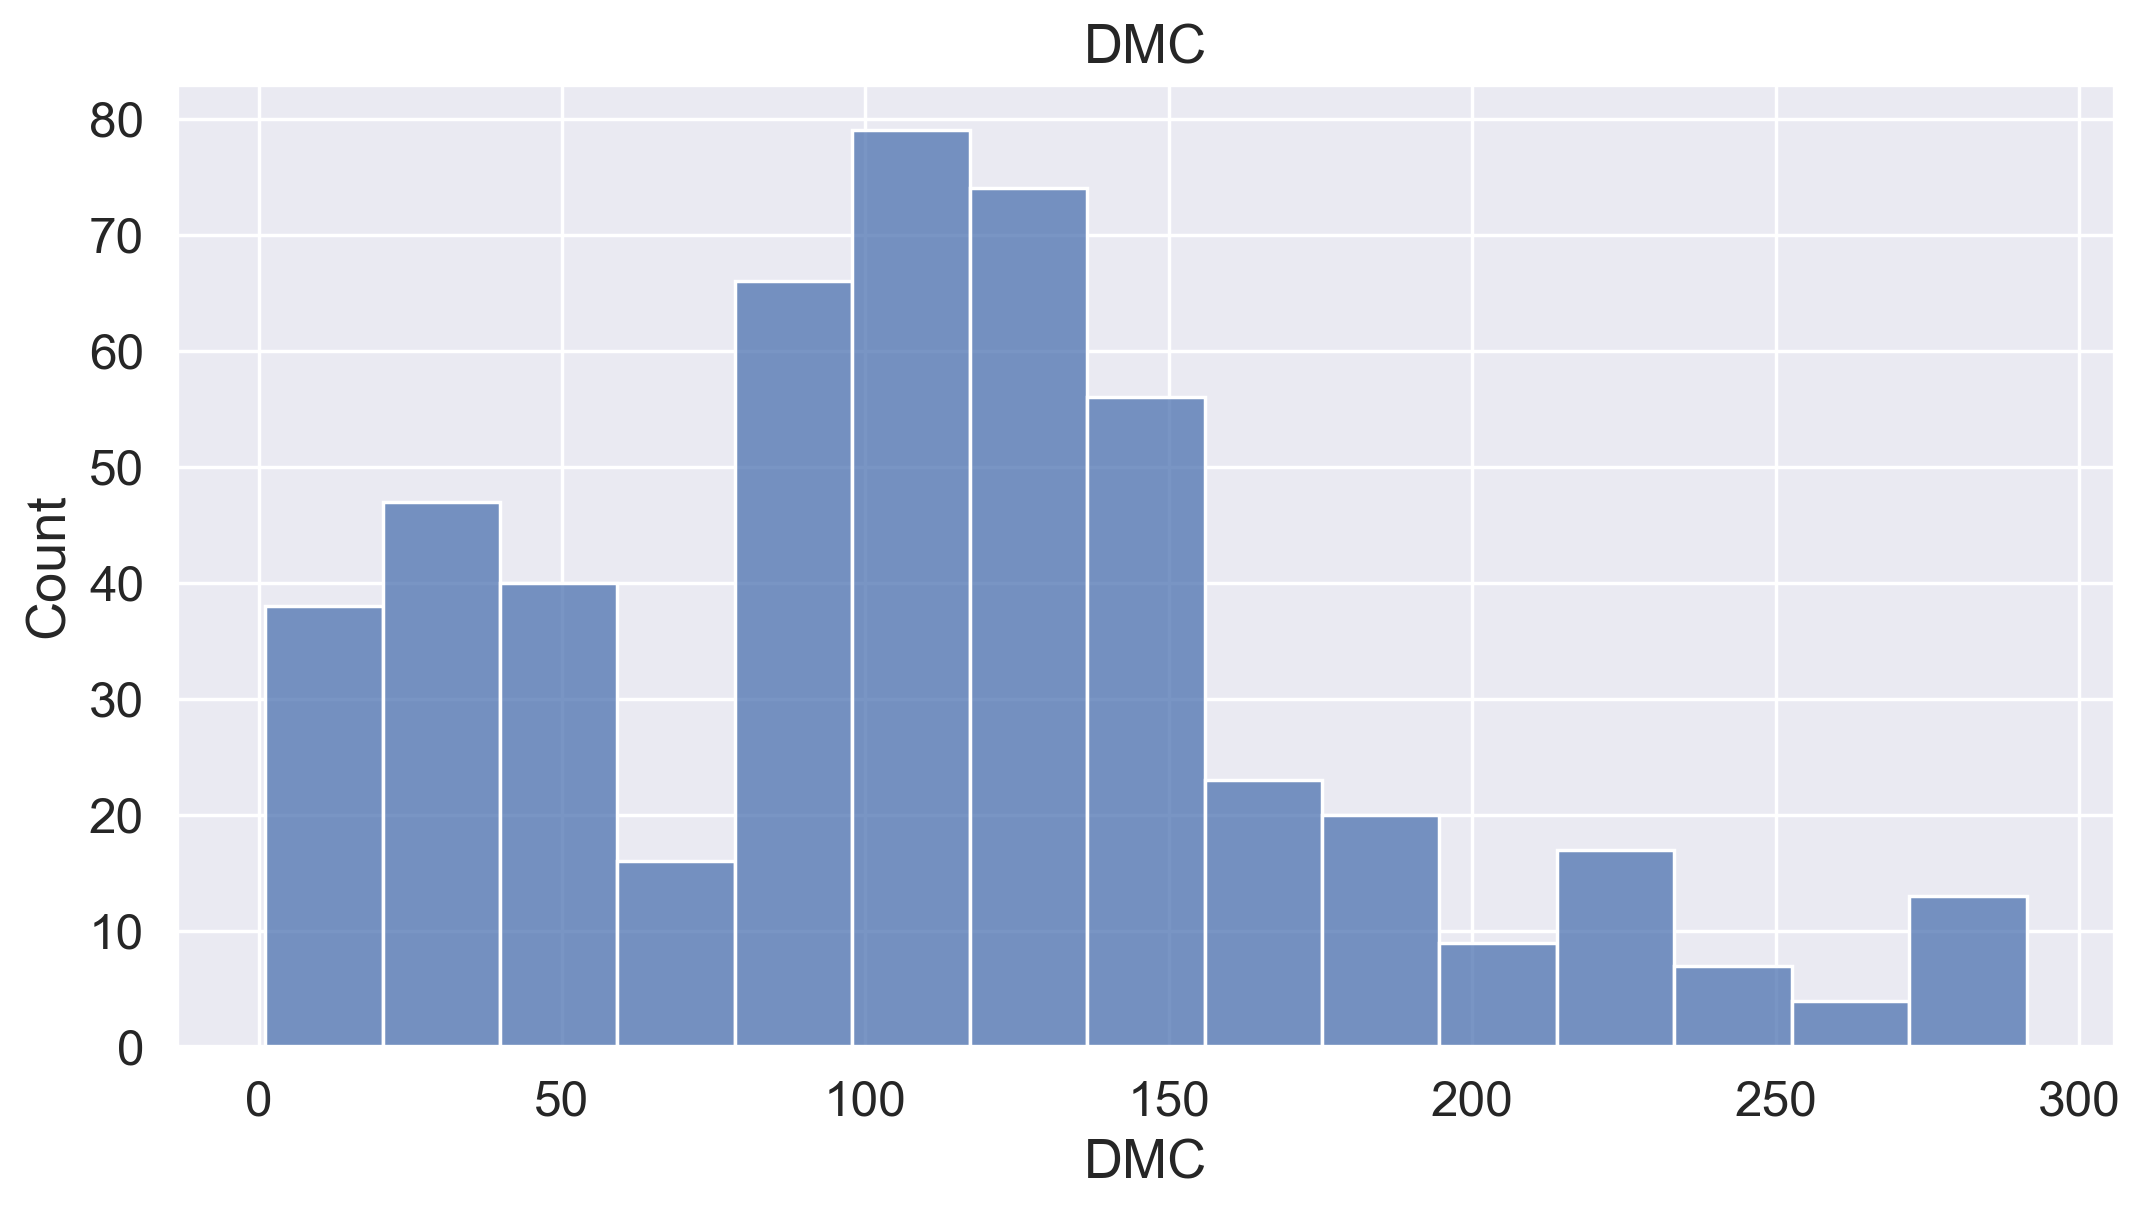

In [28]:
sns.histplot(df['DMC'])
plt.title('DMC')

Text(0.5, 1.0, 'DC')

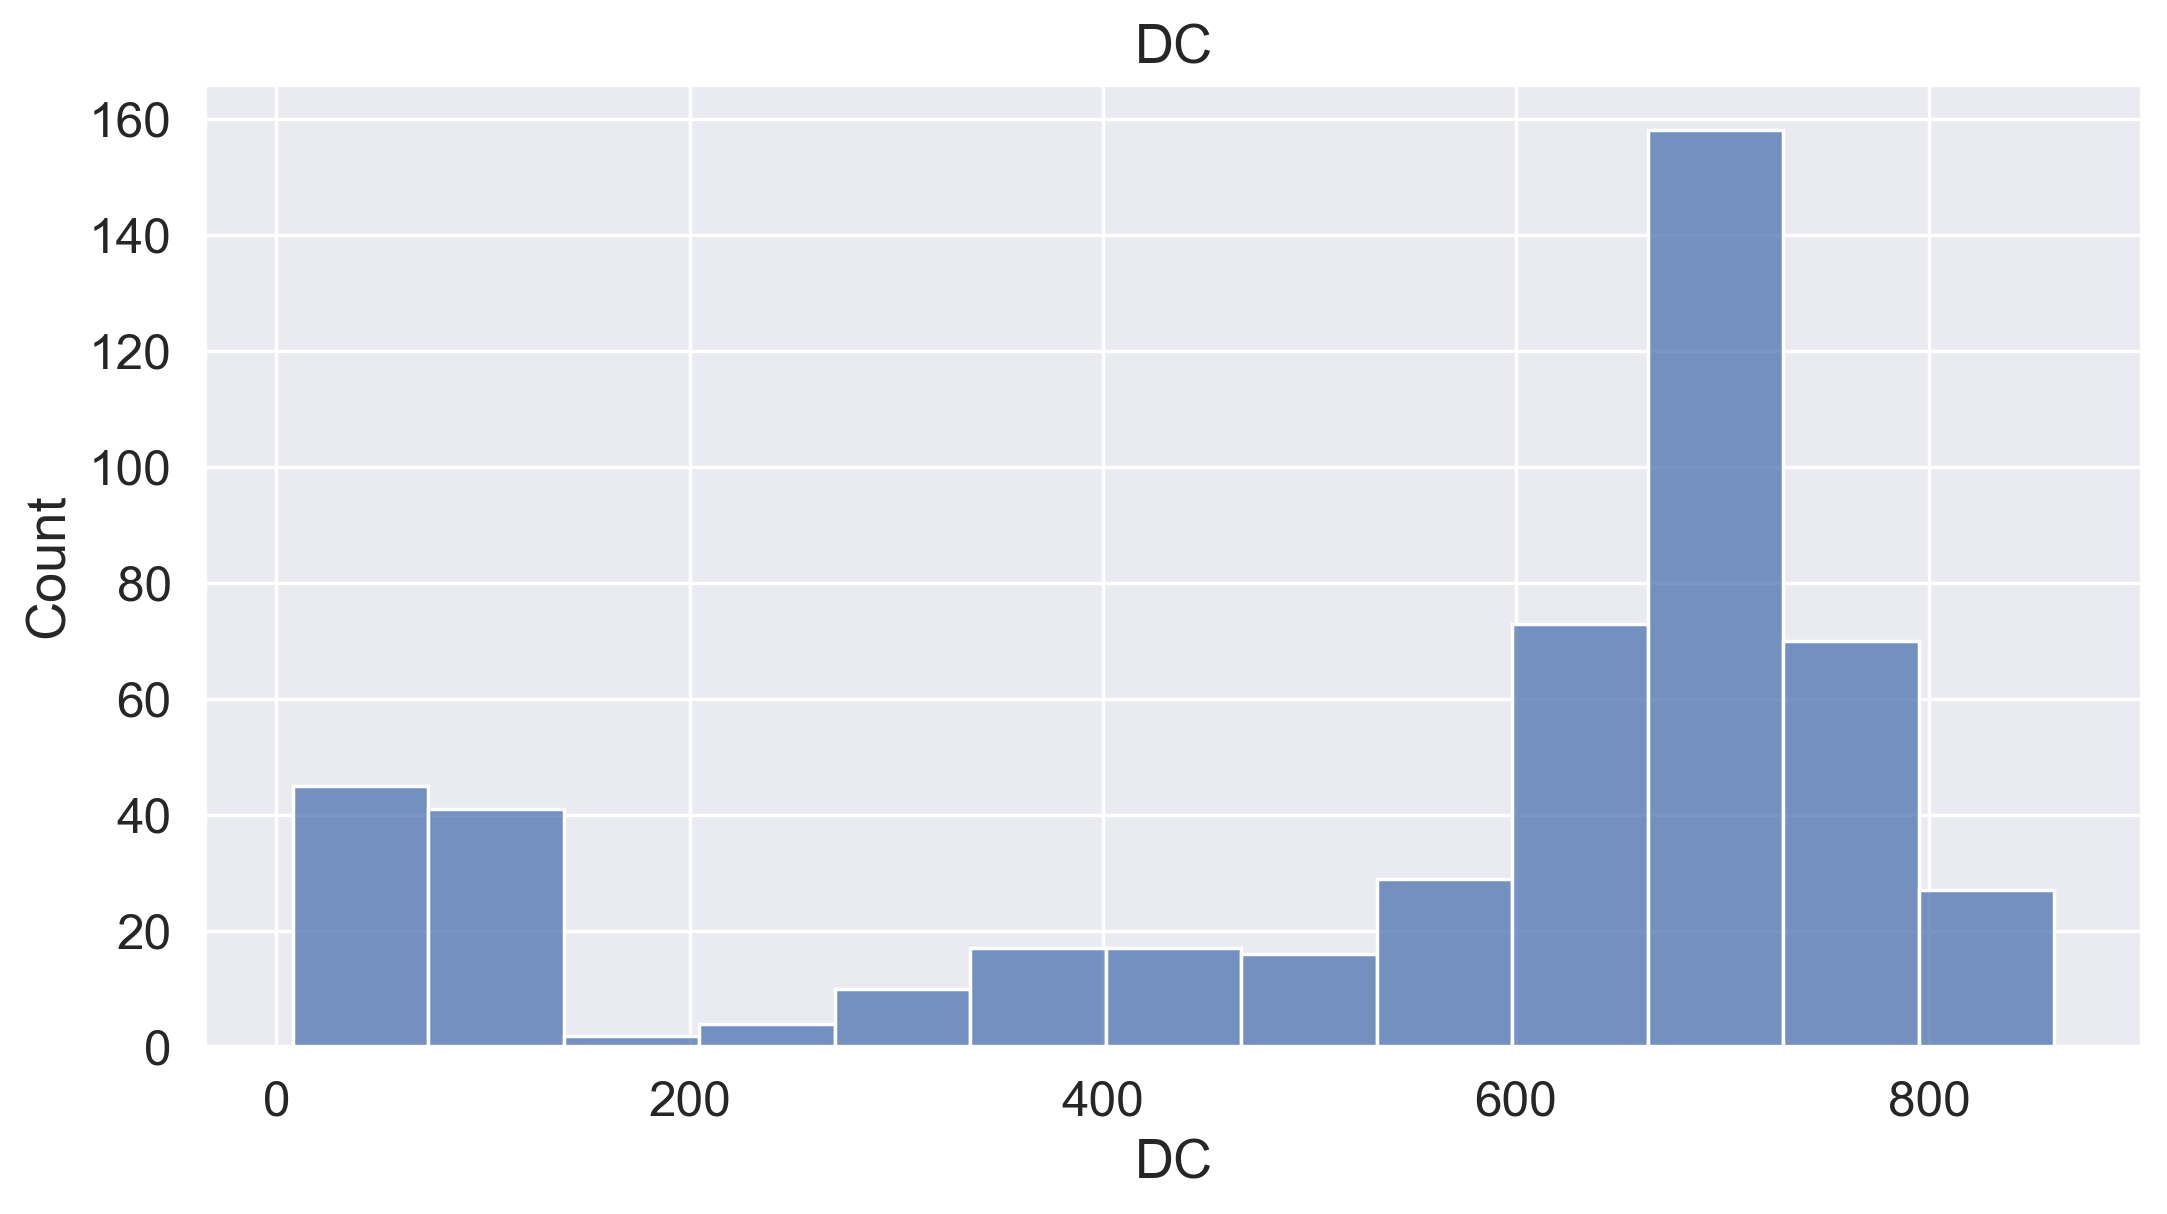

In [29]:
sns.histplot(df['DC'])
plt.title('DC')

Text(0.5, 1.0, 'ISI')

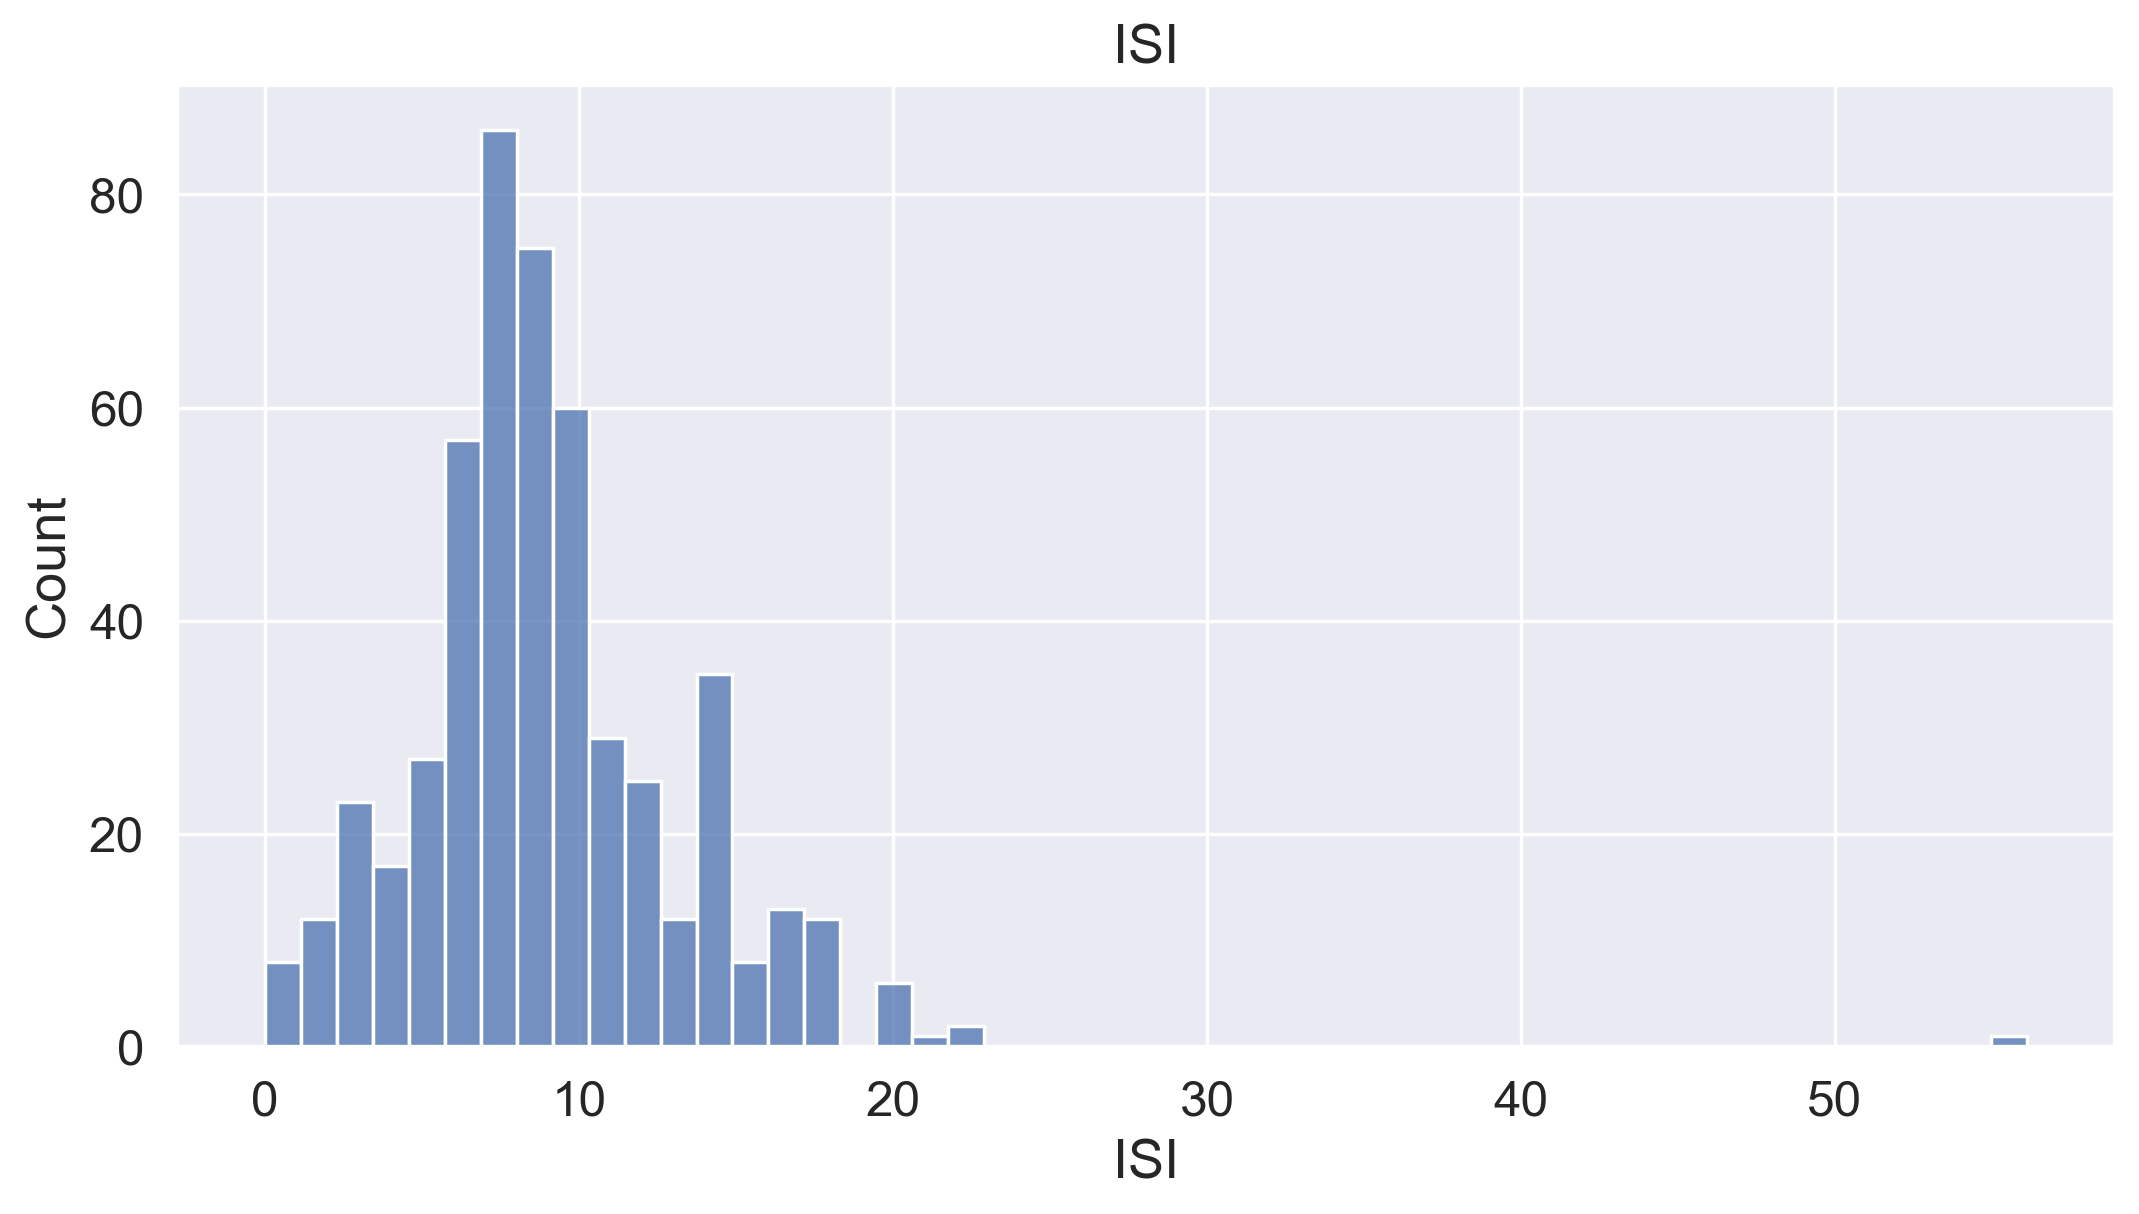

In [30]:
sns.histplot(df['ISI'])
plt.title('ISI')

Text(0.5, 1.0, 'TEMP')

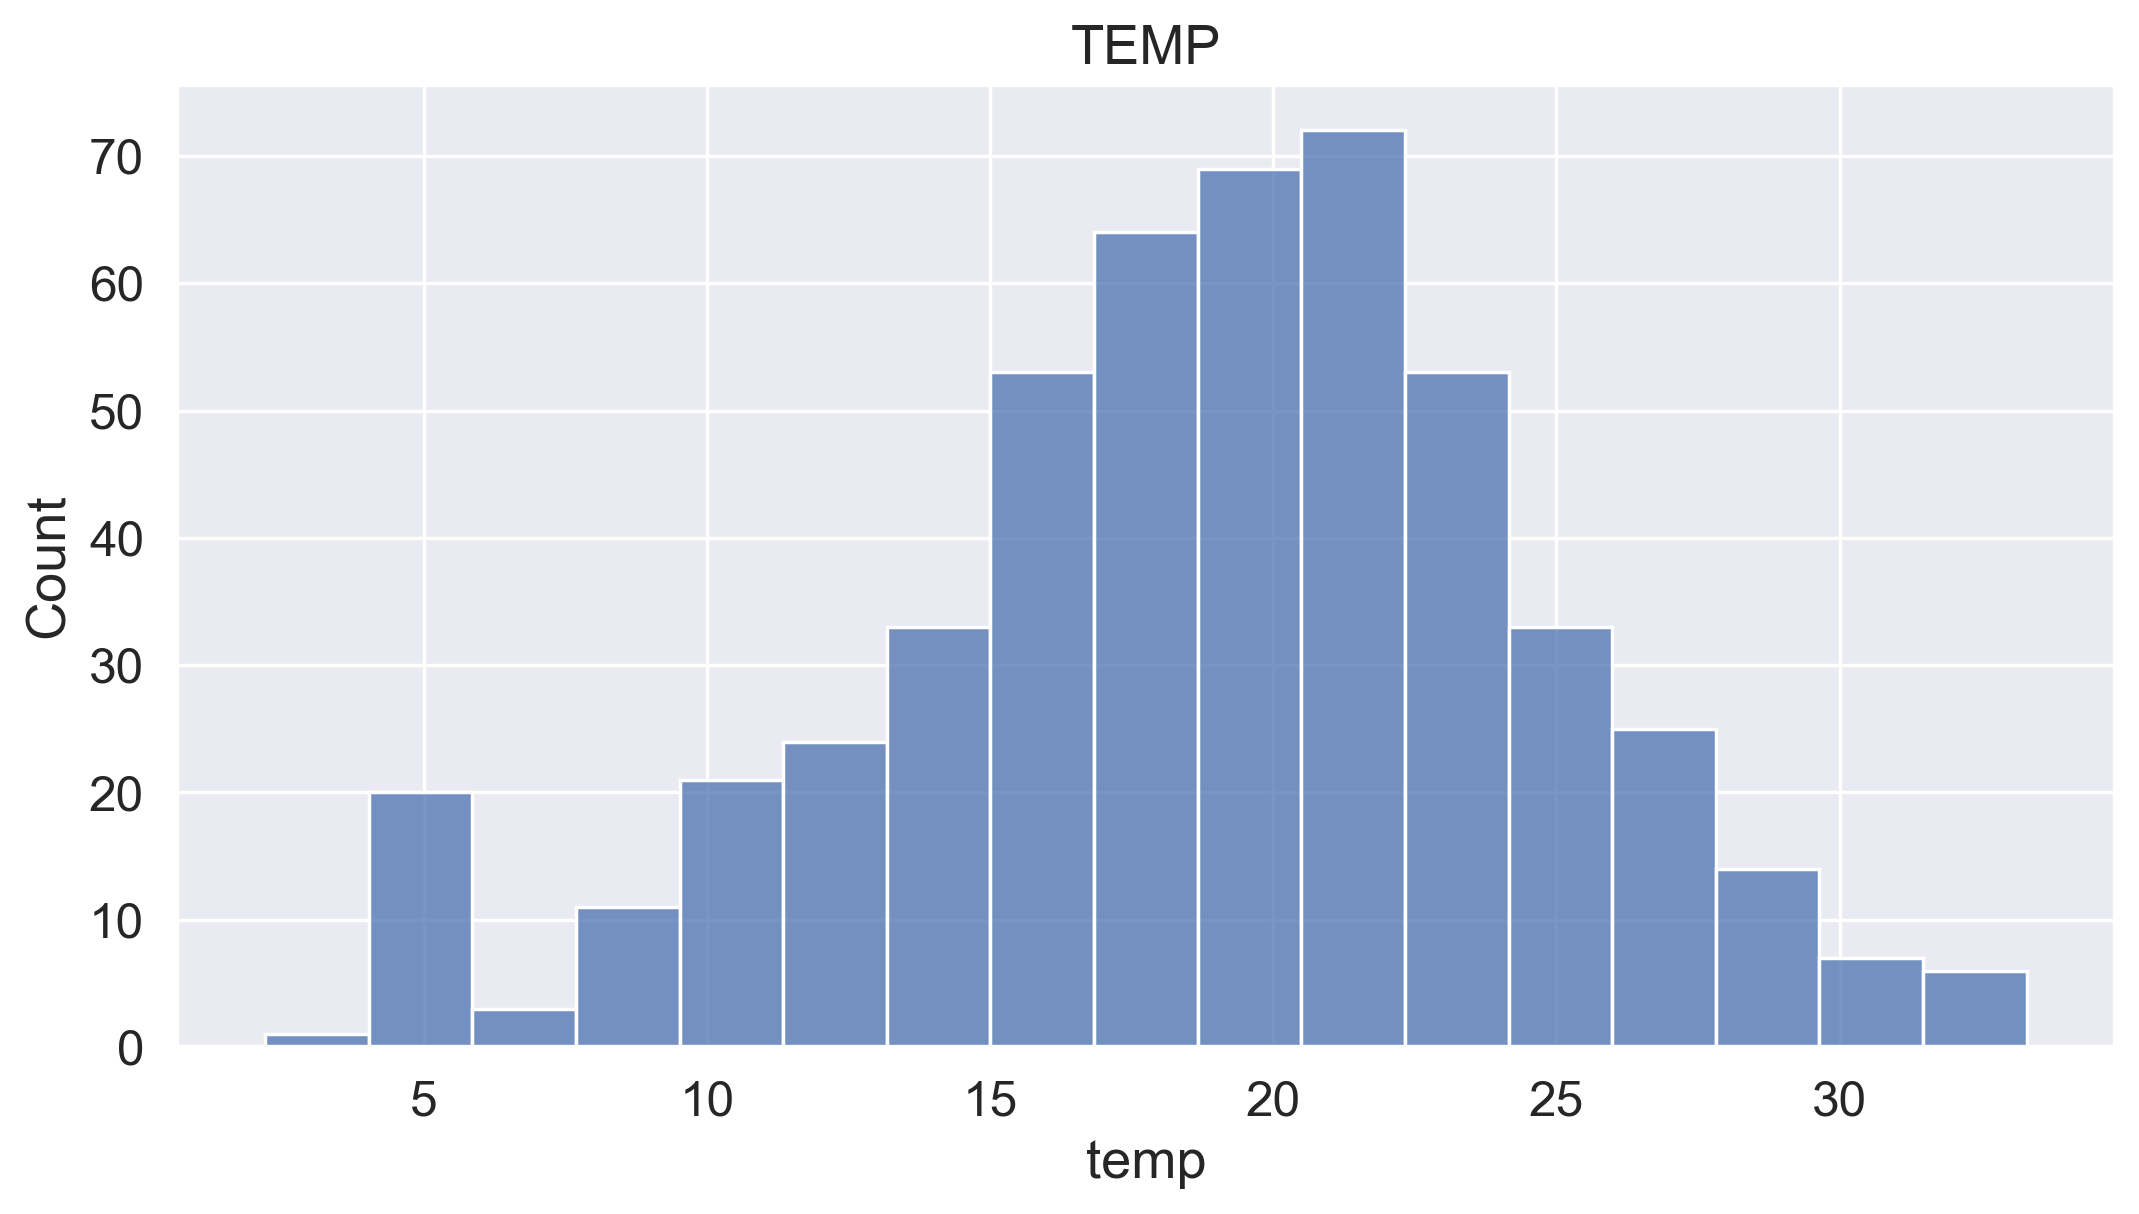

In [31]:
sns.histplot(df['temp'])
plt.title('TEMP')

Text(0.5, 1.0, 'RH')

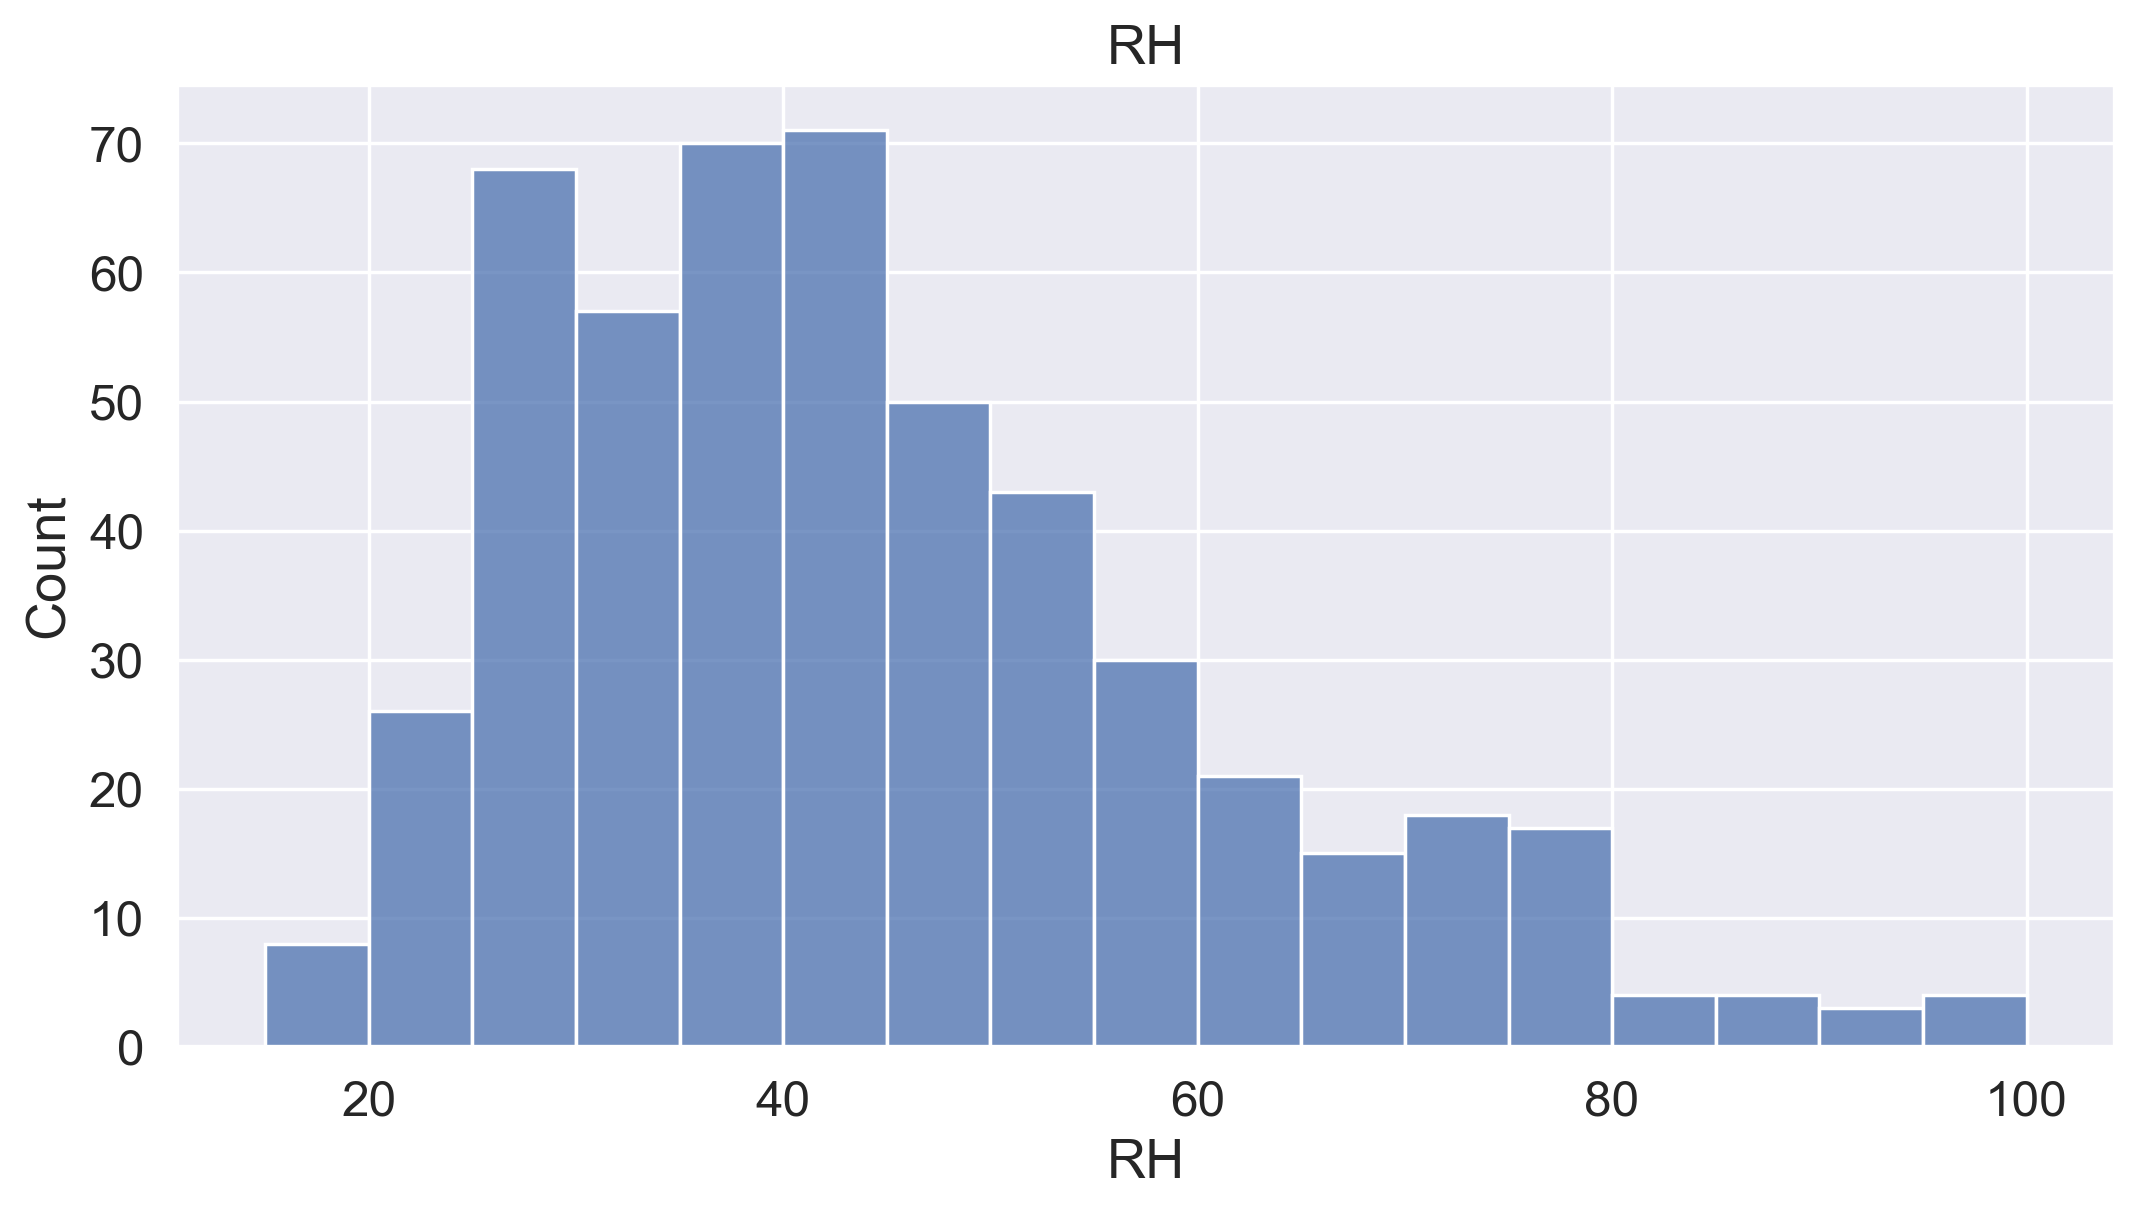

In [32]:
sns.histplot(df['RH'])
plt.title('RH')

Text(0.5, 1.0, 'Wind')

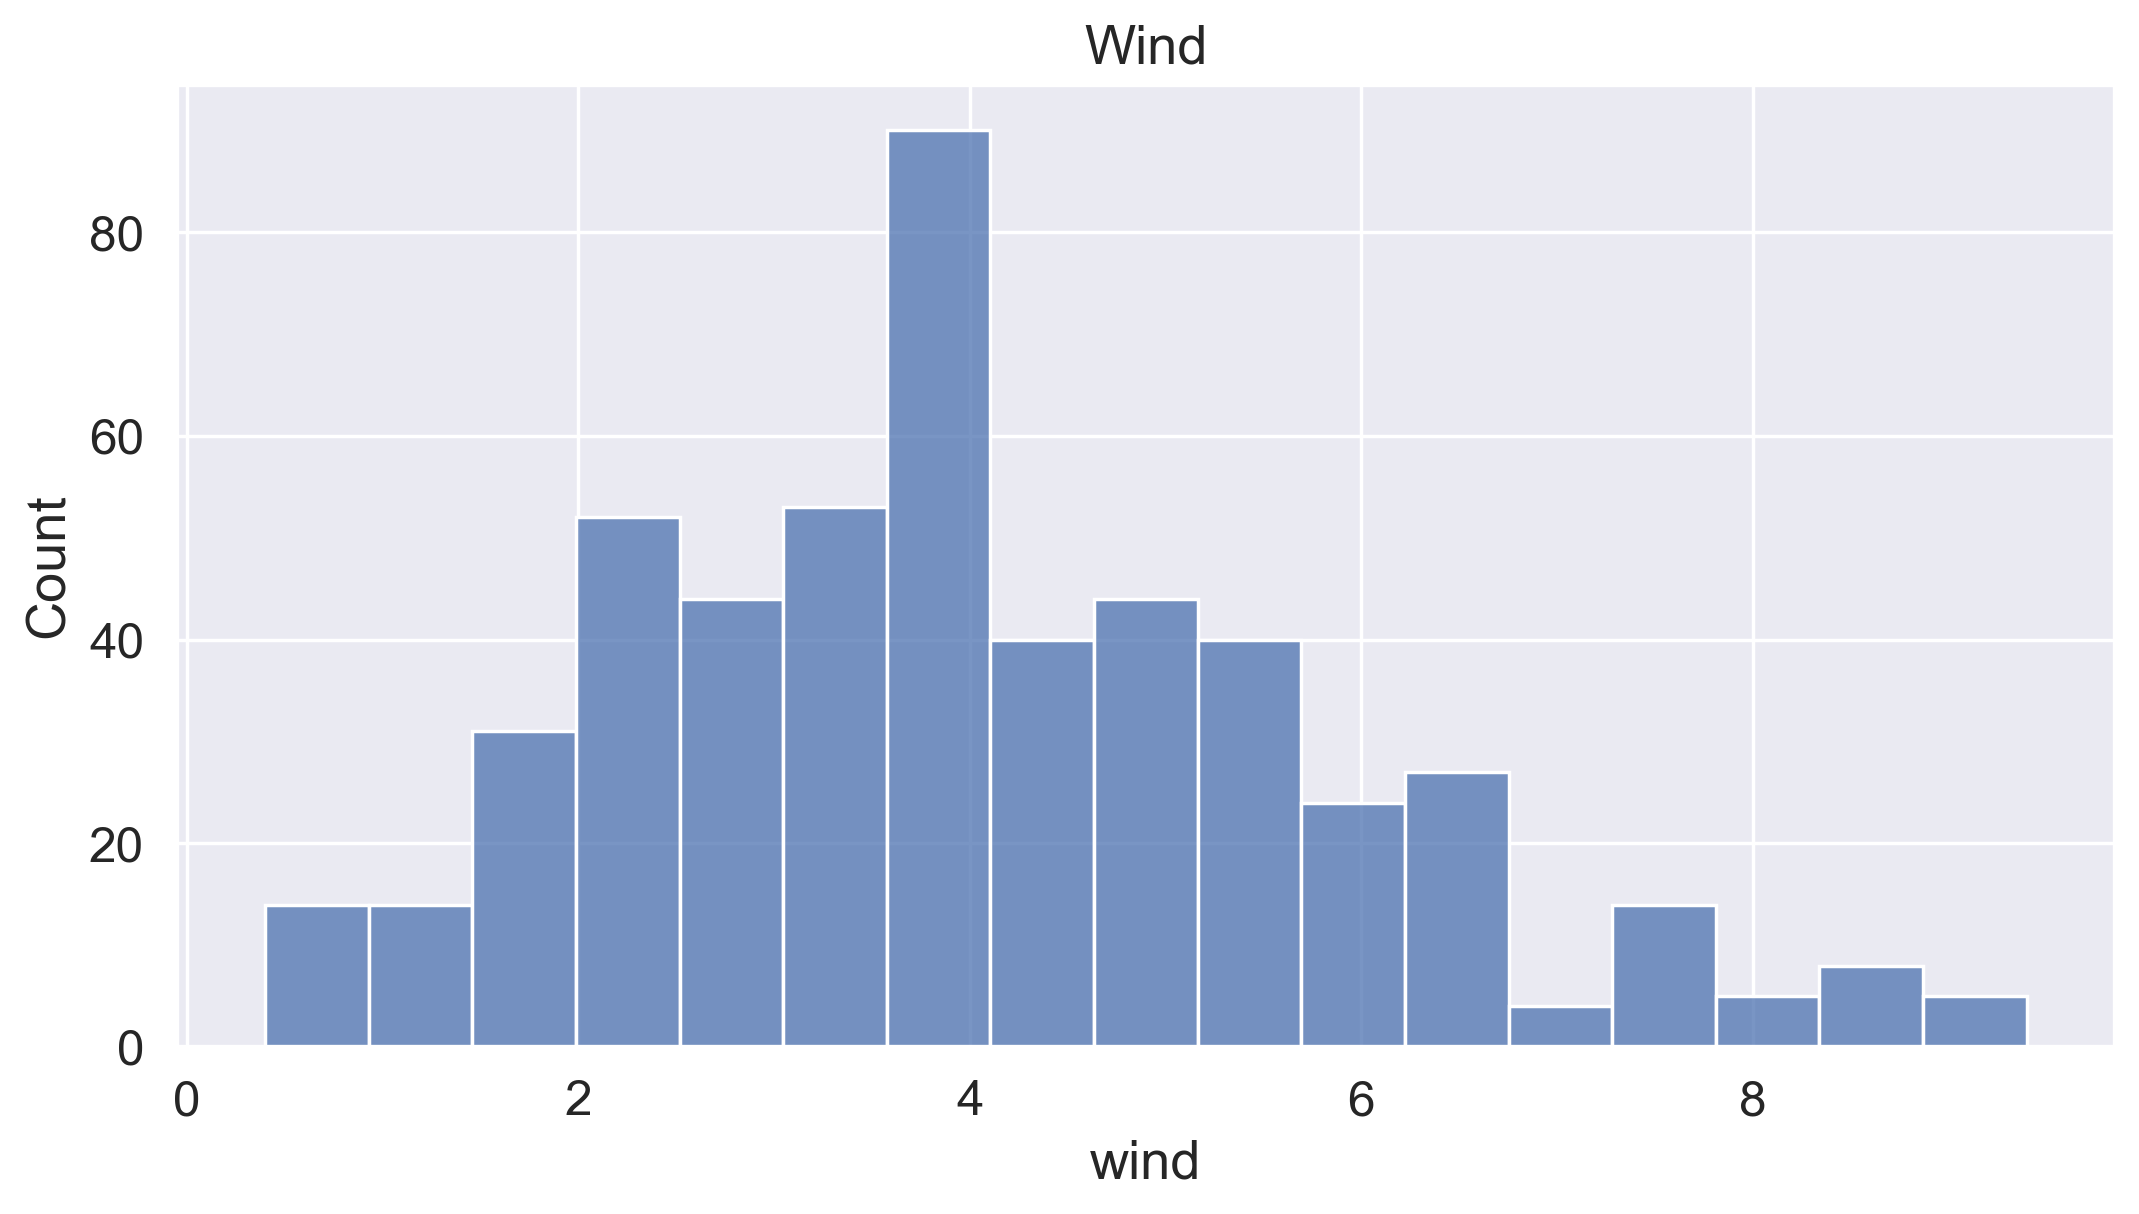

In [33]:
sns.histplot(df['wind'])
plt.title('Wind')

Text(0.5, 1.0, 'RAIN')

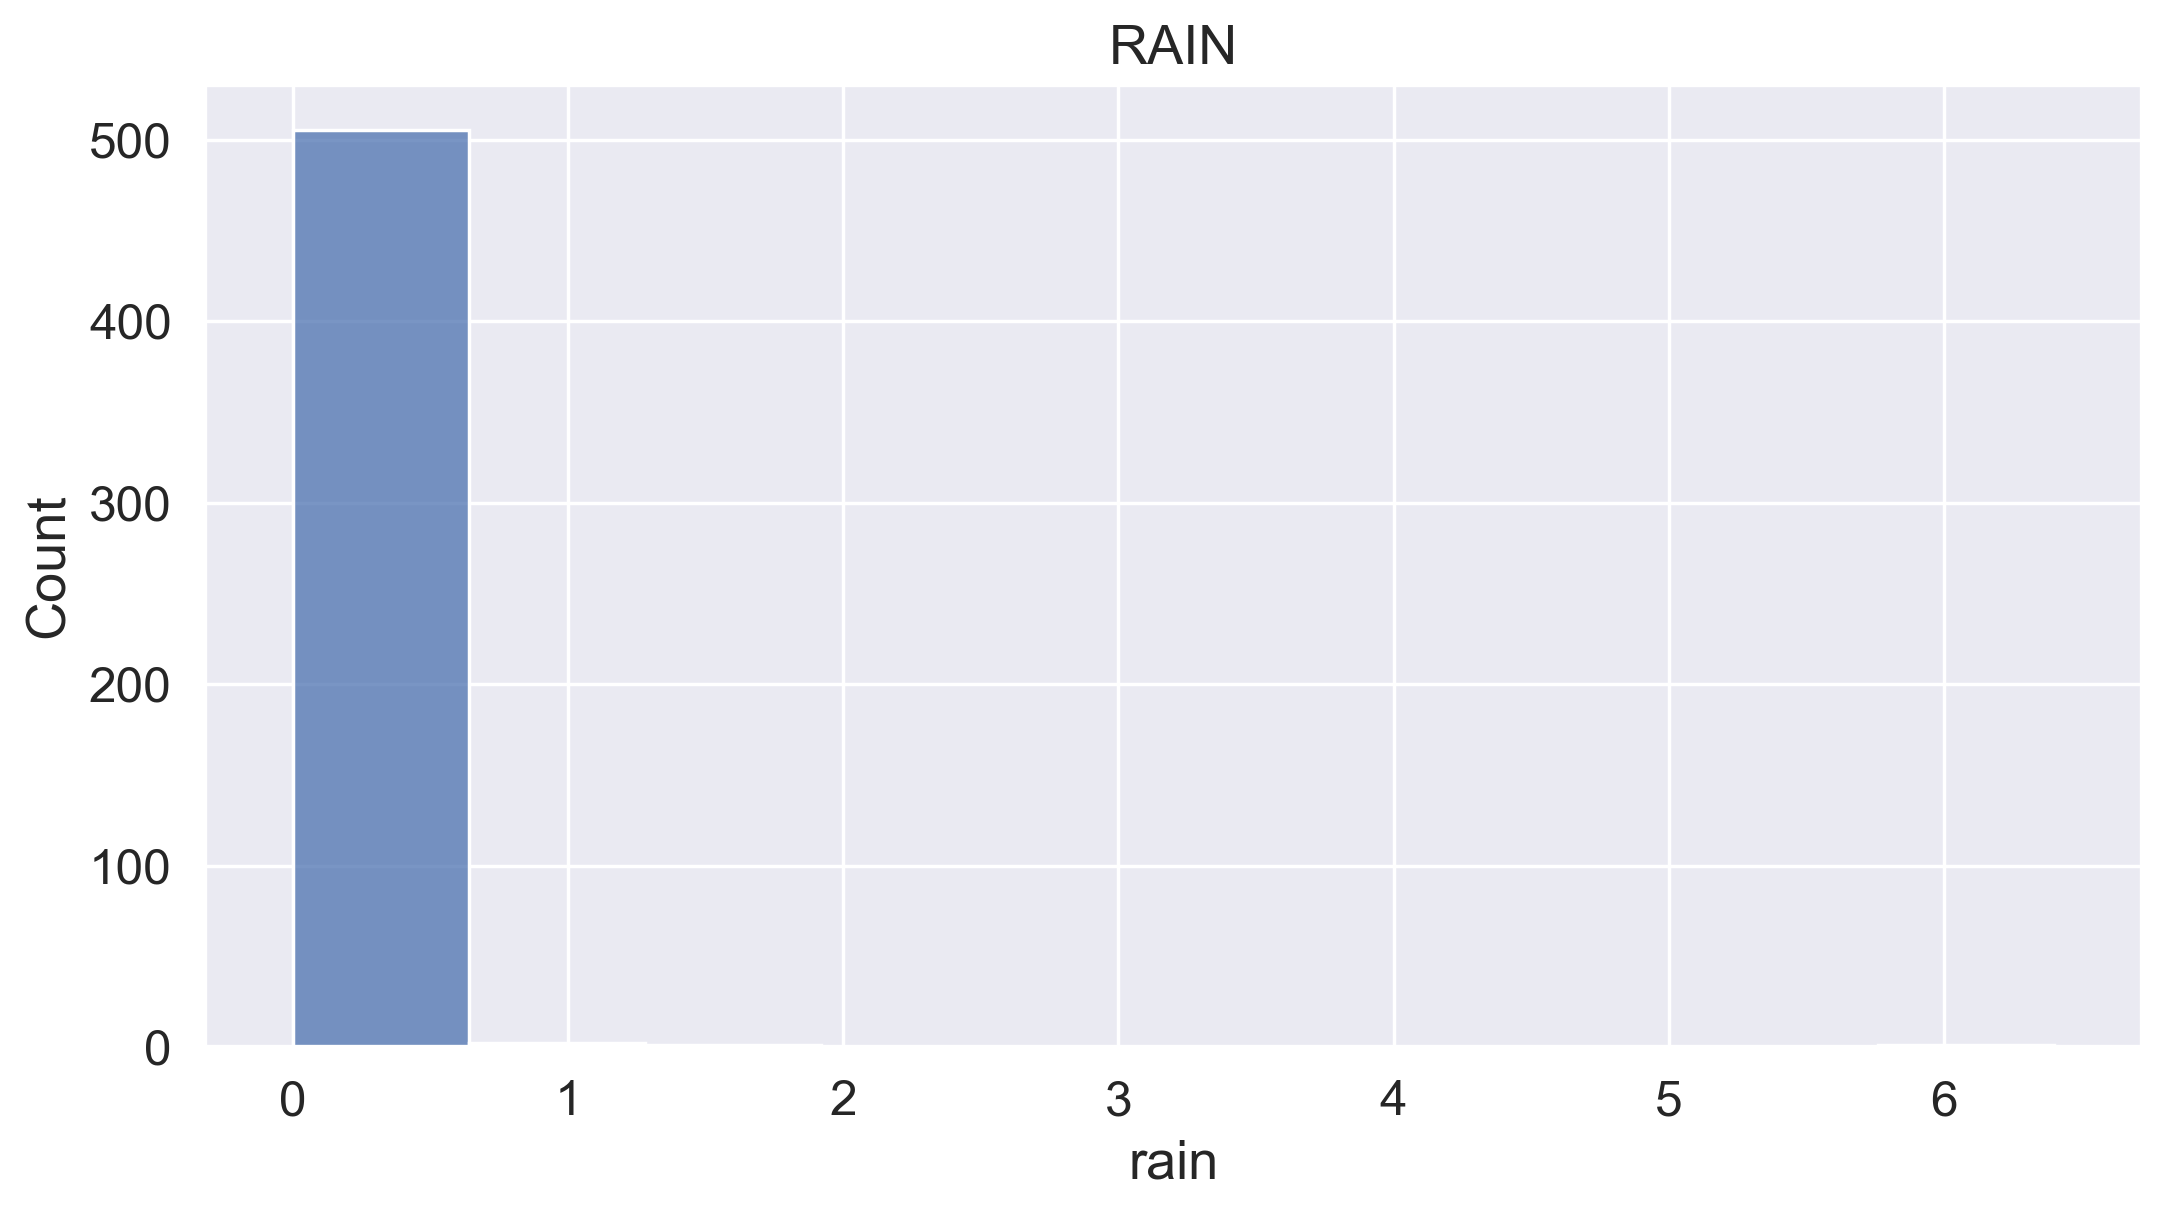

In [34]:
sns.histplot(df['rain'])
plt.title('RAIN')

Text(0.5, 1.0, 'AREA')

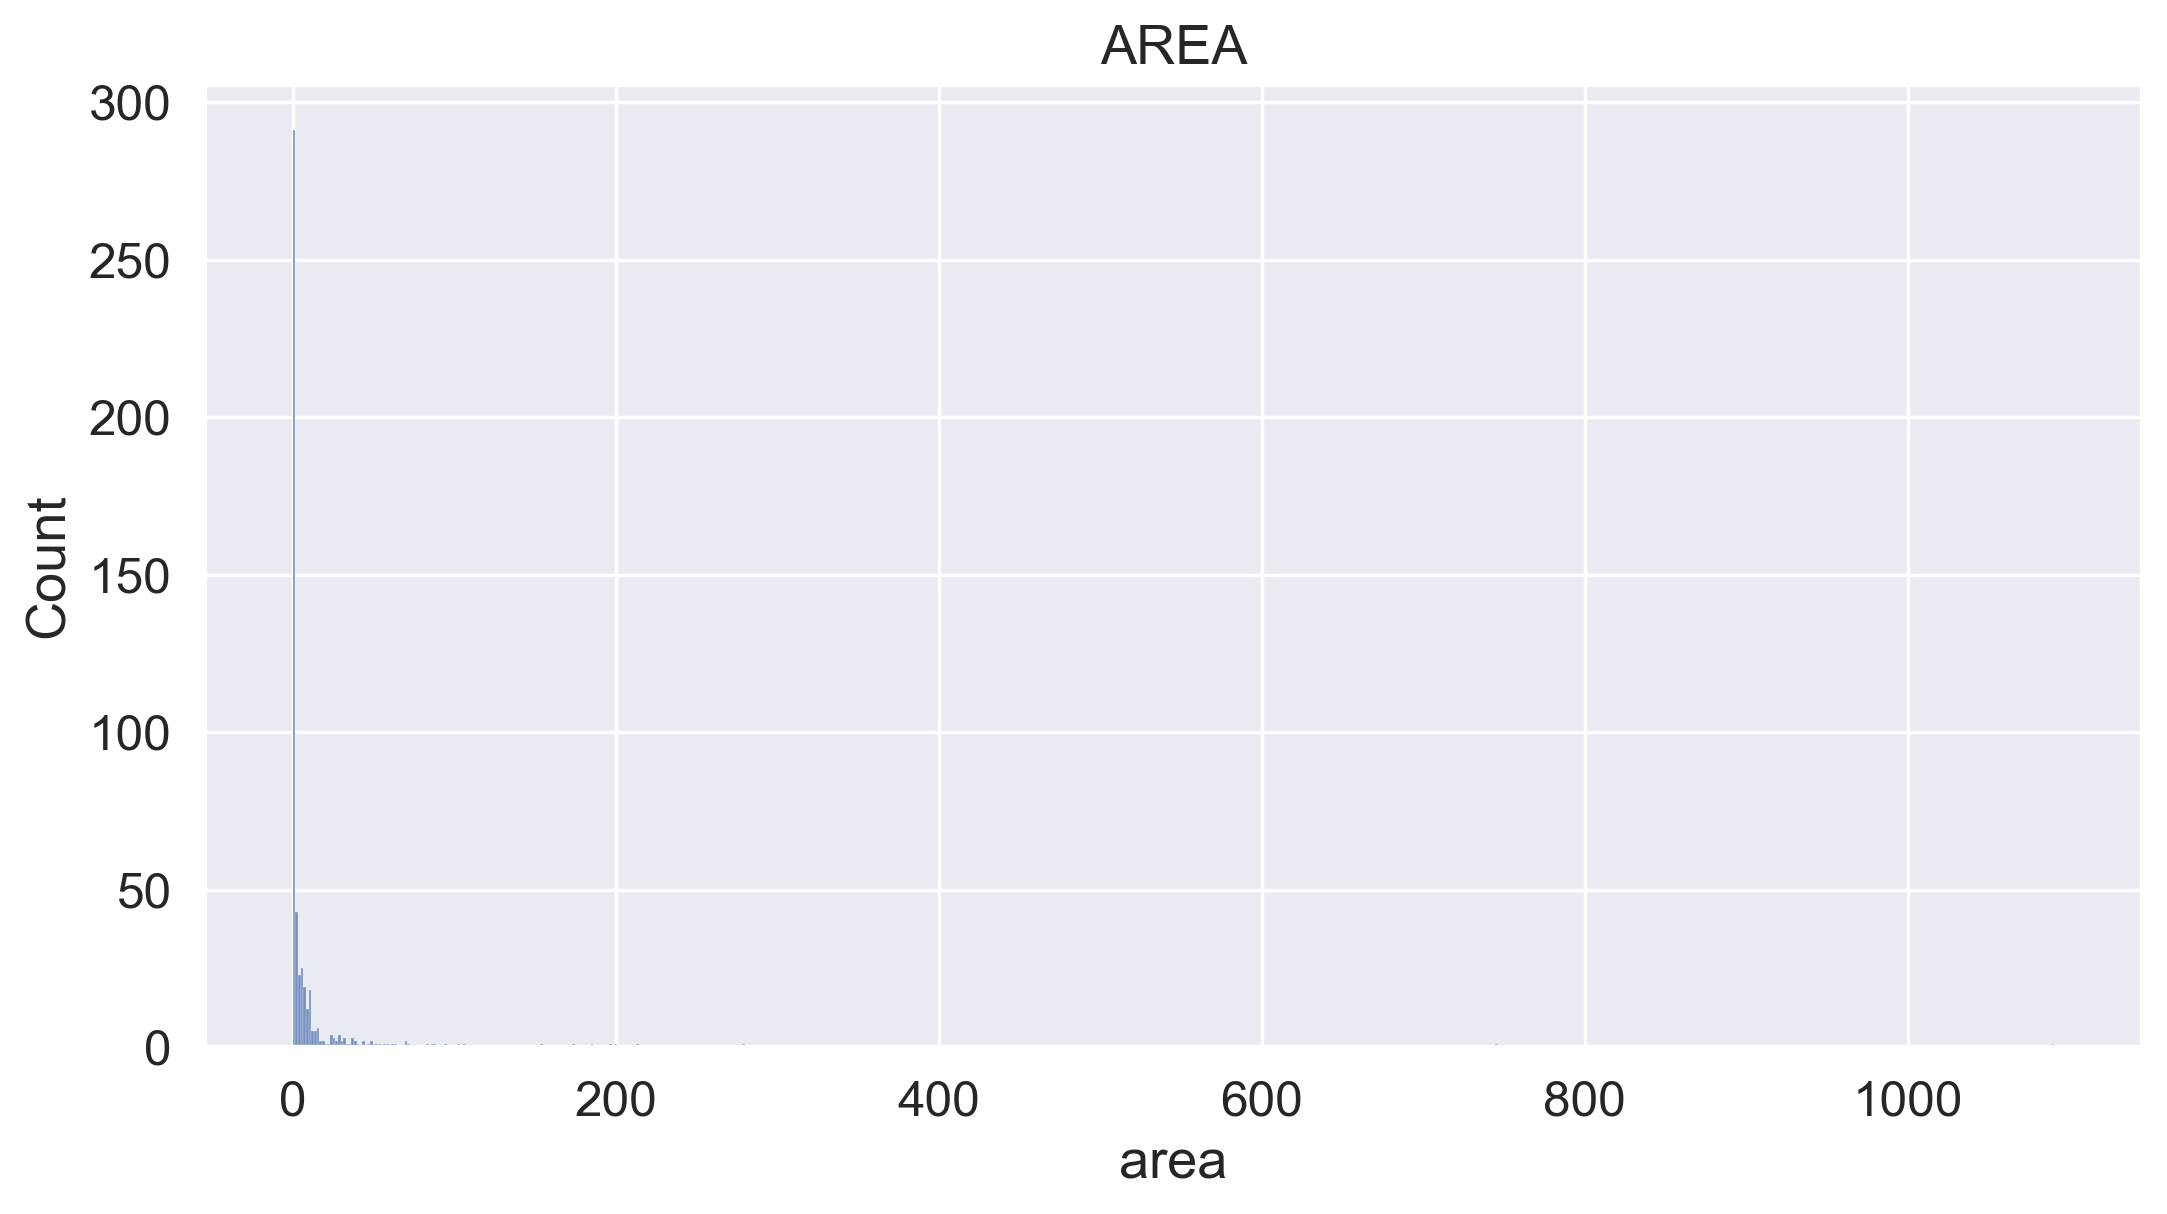

In [35]:
sns.histplot(df['area'])
plt.title('AREA')

Text(0.5, 1.0, 'Month')

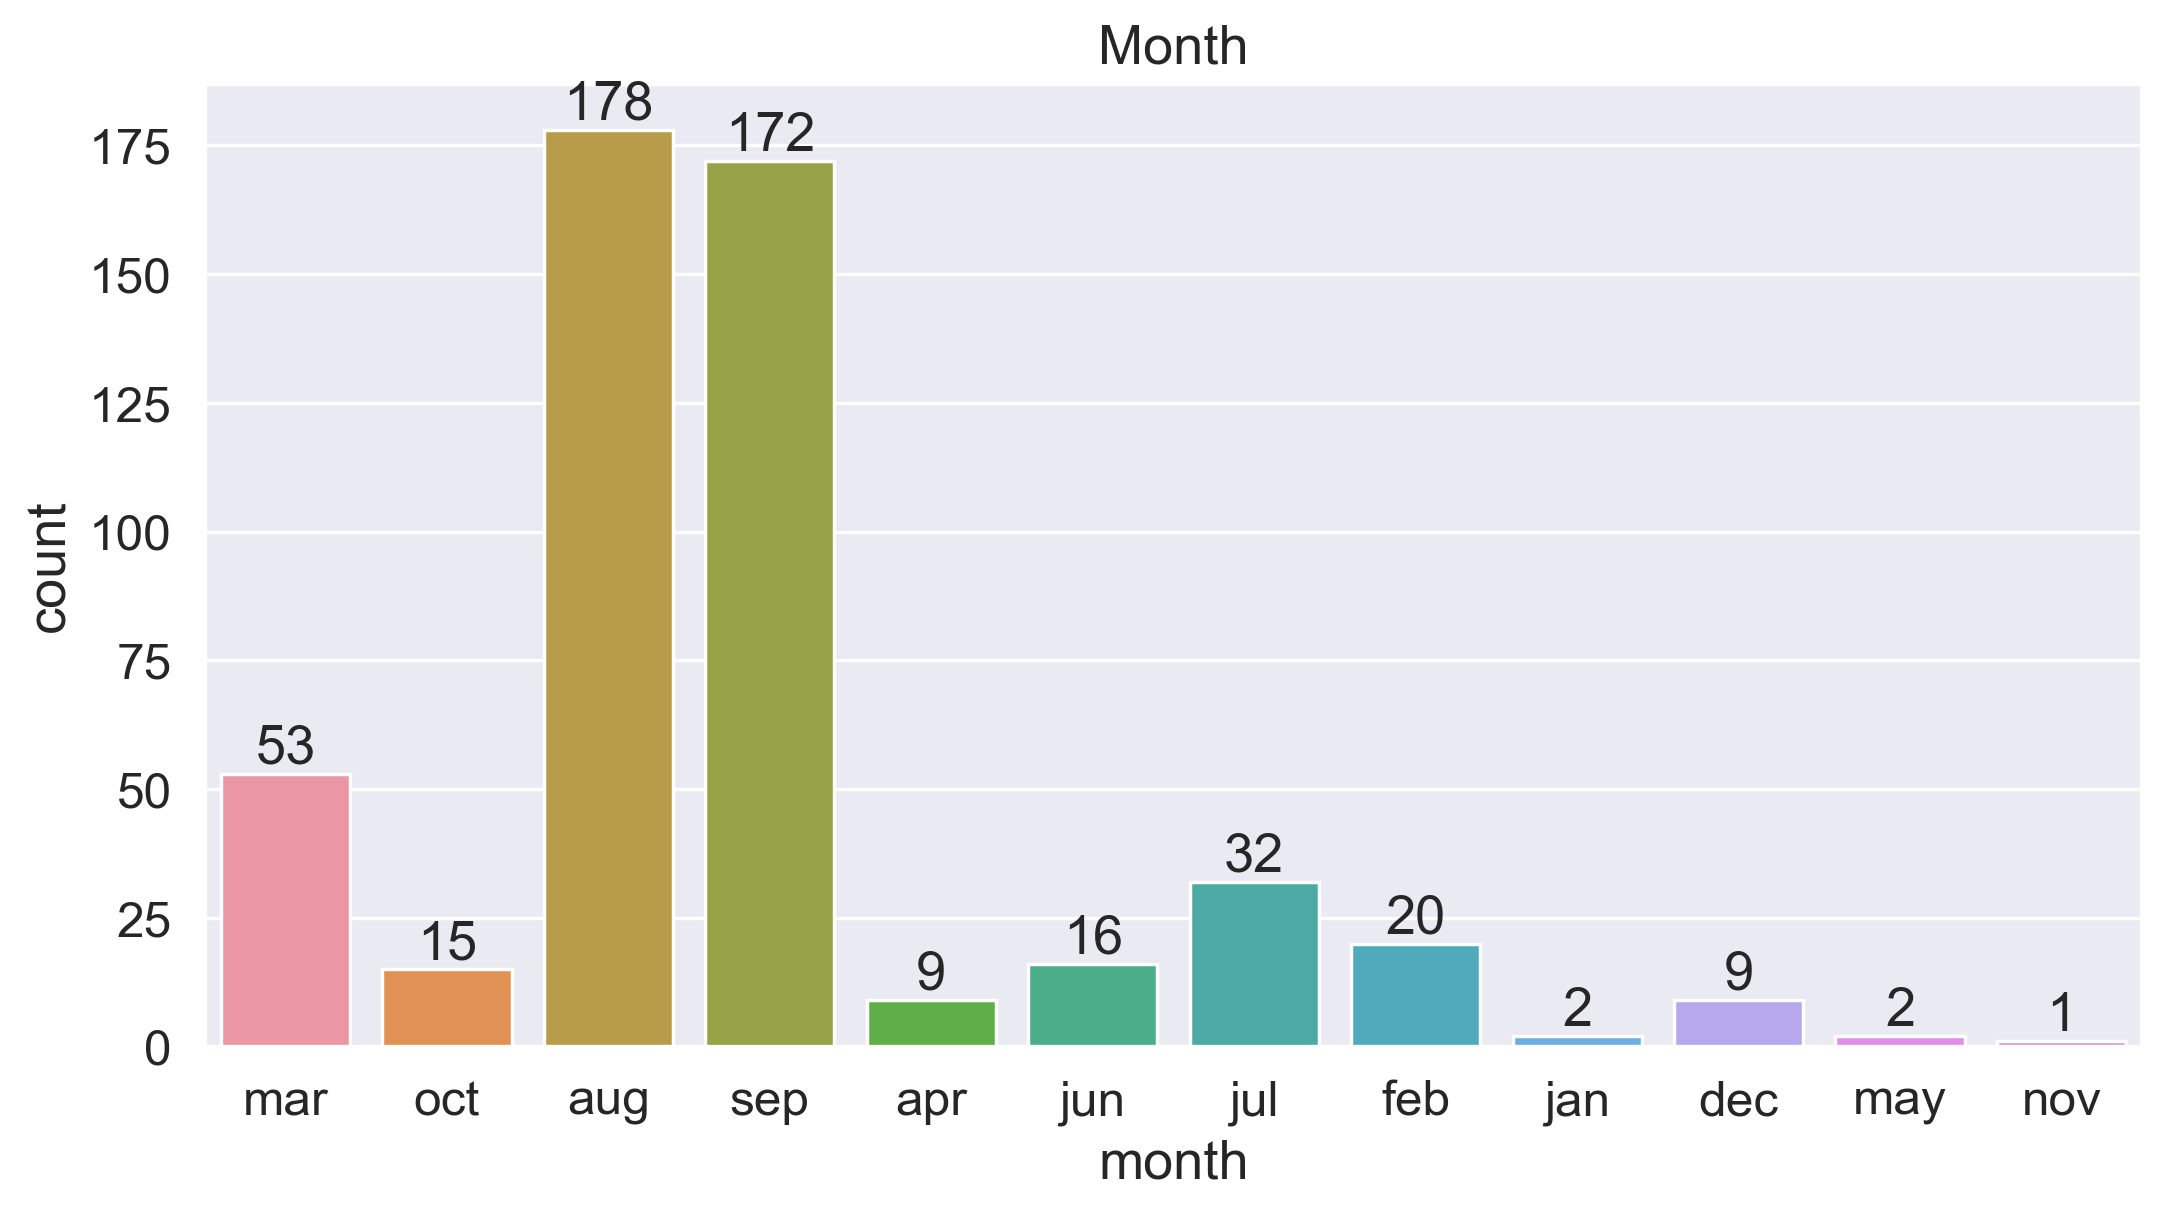

In [38]:
ax = sns.countplot(x = 'month', data = df)
ax.bar_label(ax.containers[0])
plt.title('Month')

Text(0.5, 1.0, 'Day')

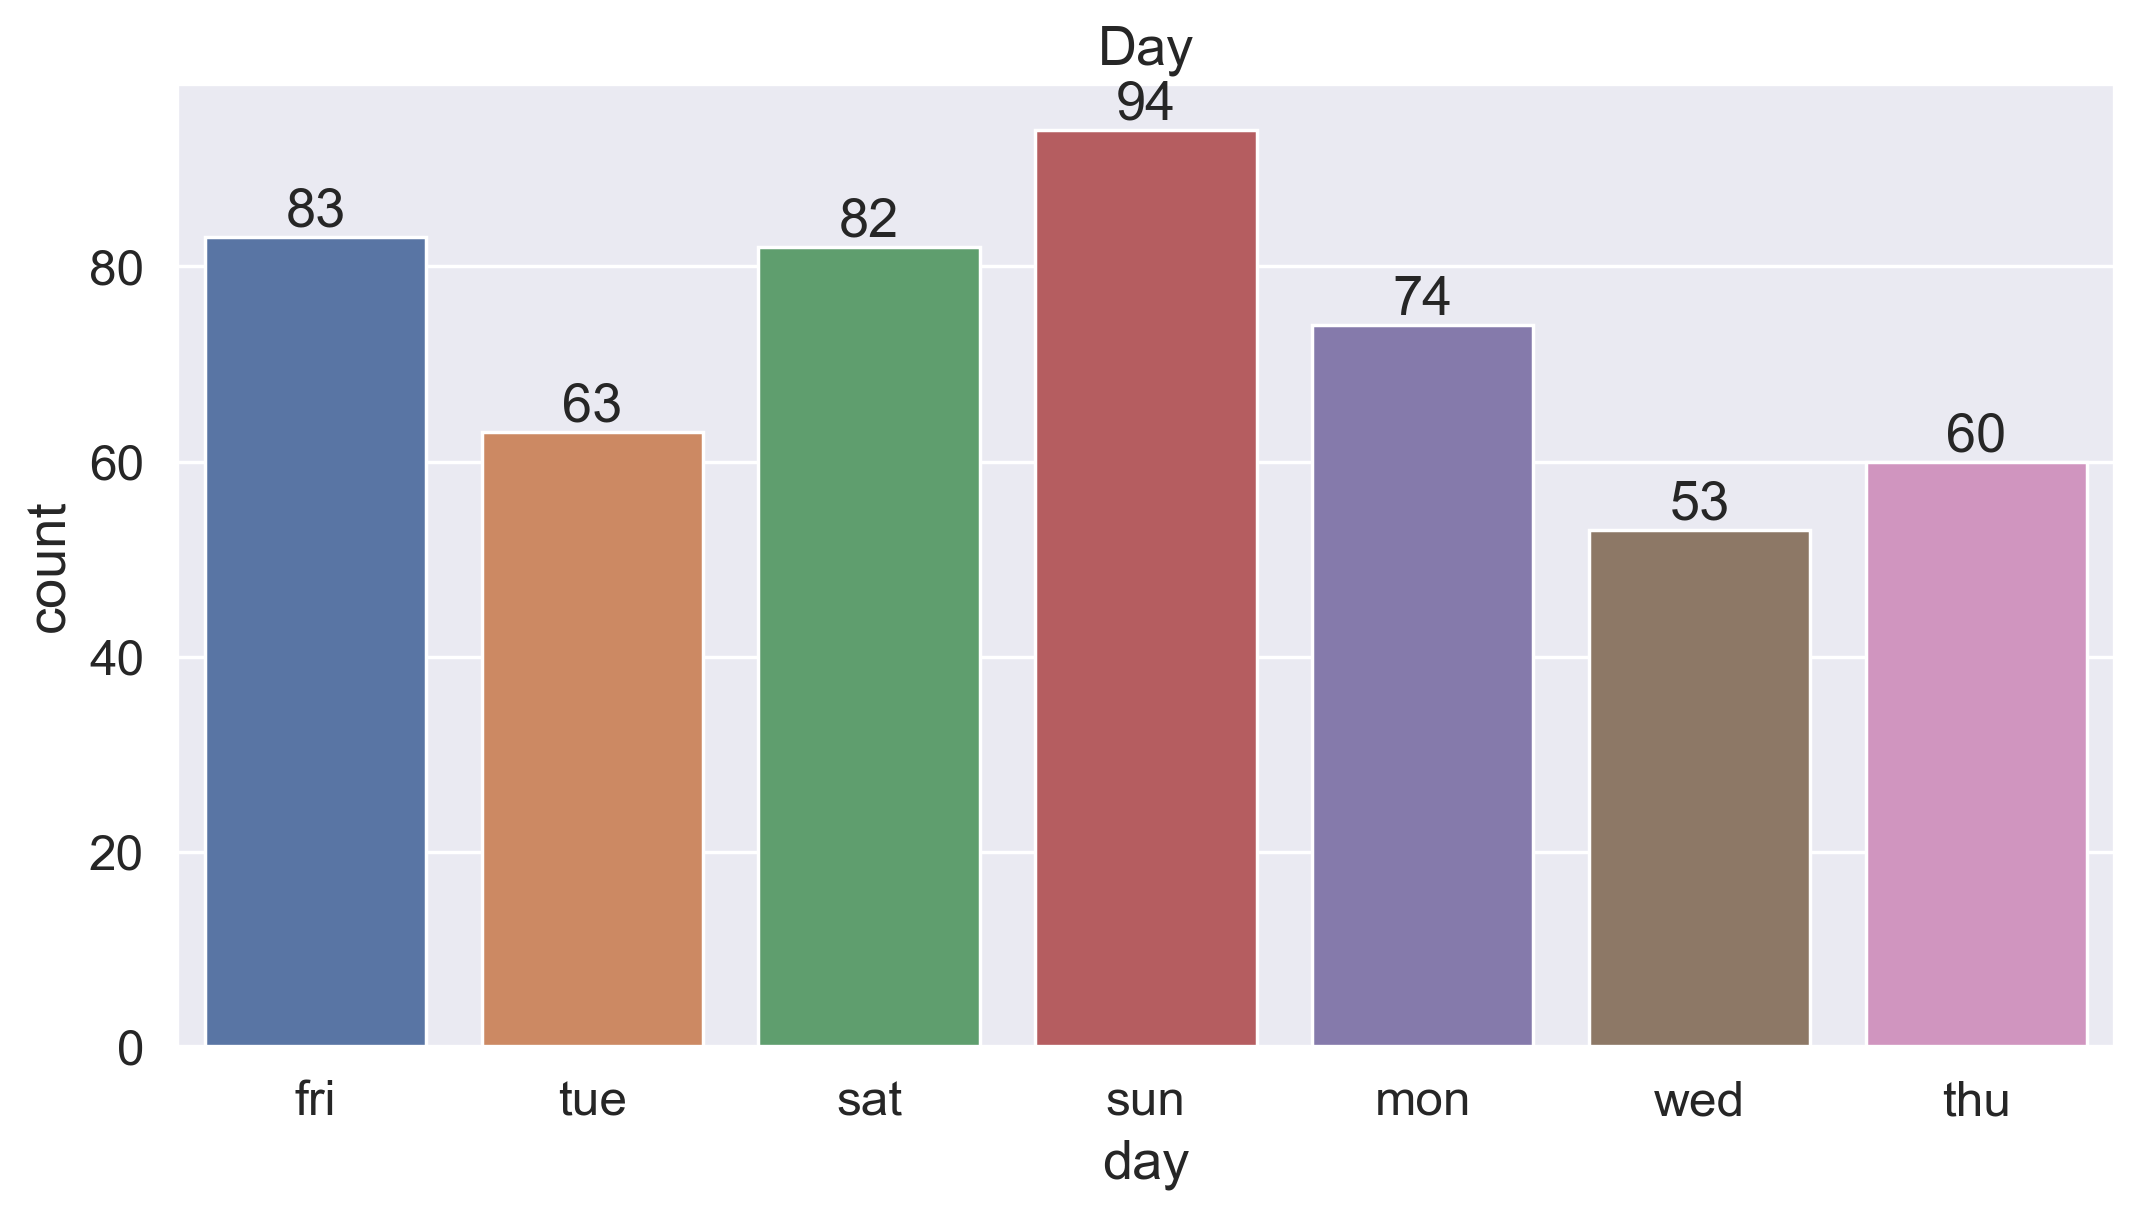

In [39]:
ax = sns.countplot(x = 'day', data = df)
ax.bar_label(ax.containers[0])
plt.title('Day')

In [40]:
# Drop month and day variable

In [41]:
df.drop(columns = ['month','day'], axis = 1, inplace = True)
df

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area size_category
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00         small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00         small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00         small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...           ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44         large
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29         large
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16         large
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00         small
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         small

[509 rows x 10 columns]

In [42]:
# Label encoding for target variable

In [43]:
le = LabelEncoder()

df['size_category'] = le.fit_transform(df['size_category'])

df

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  size_category
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00              1
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00              1
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00              1
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00              1
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00              1
..    ...    ...    ...   ...   ...  ..   ...   ...    ...            ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44              0
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29              0
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16              0
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00              1
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00              1

[509 rows x 10 columns]

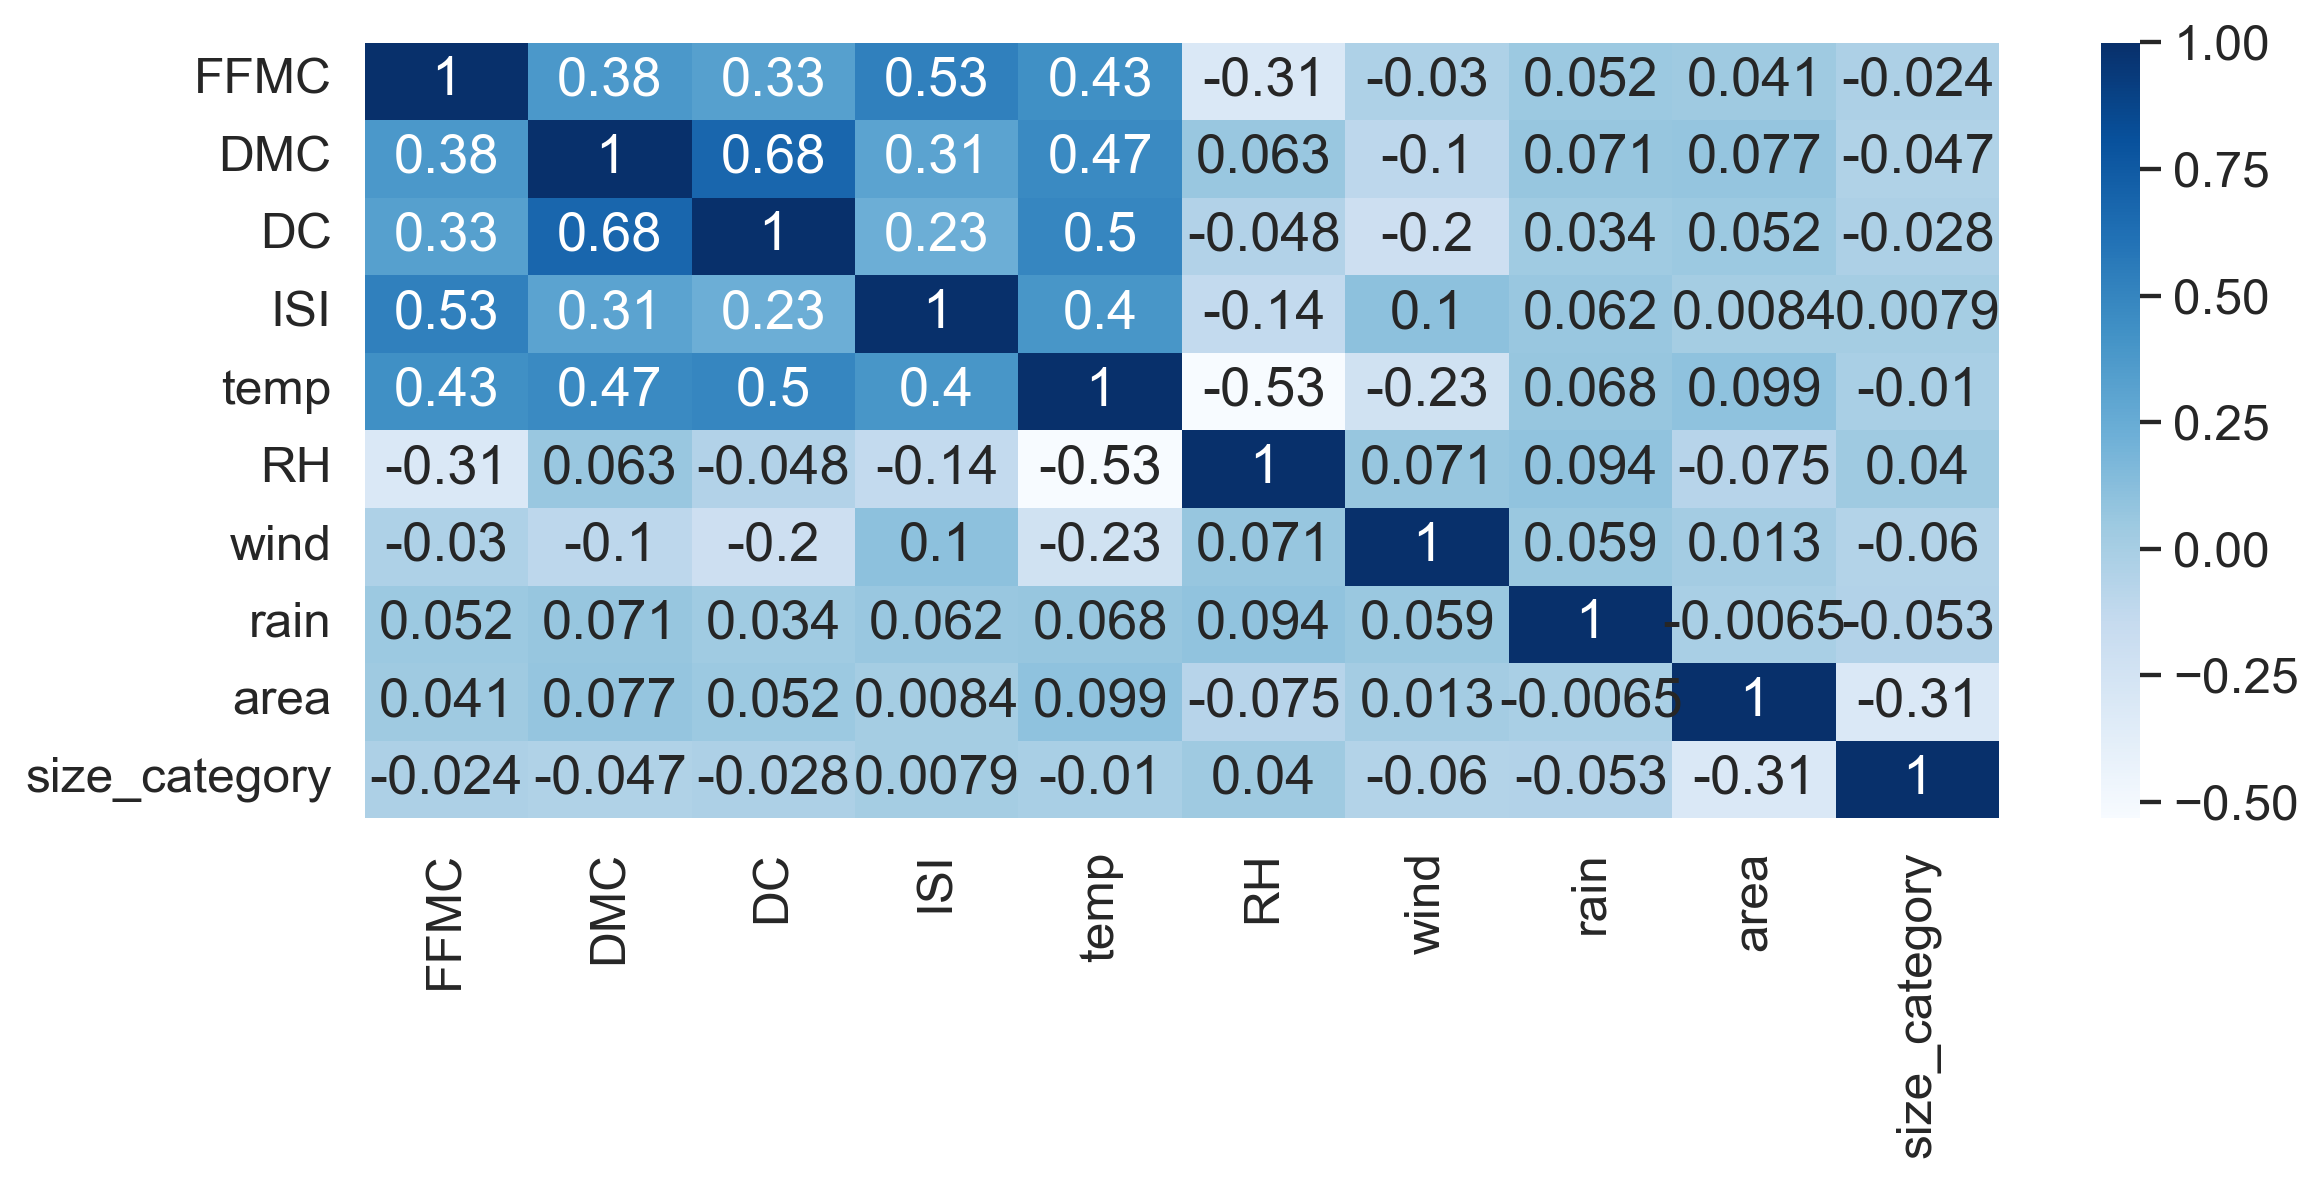

In [44]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.tight_layout() 

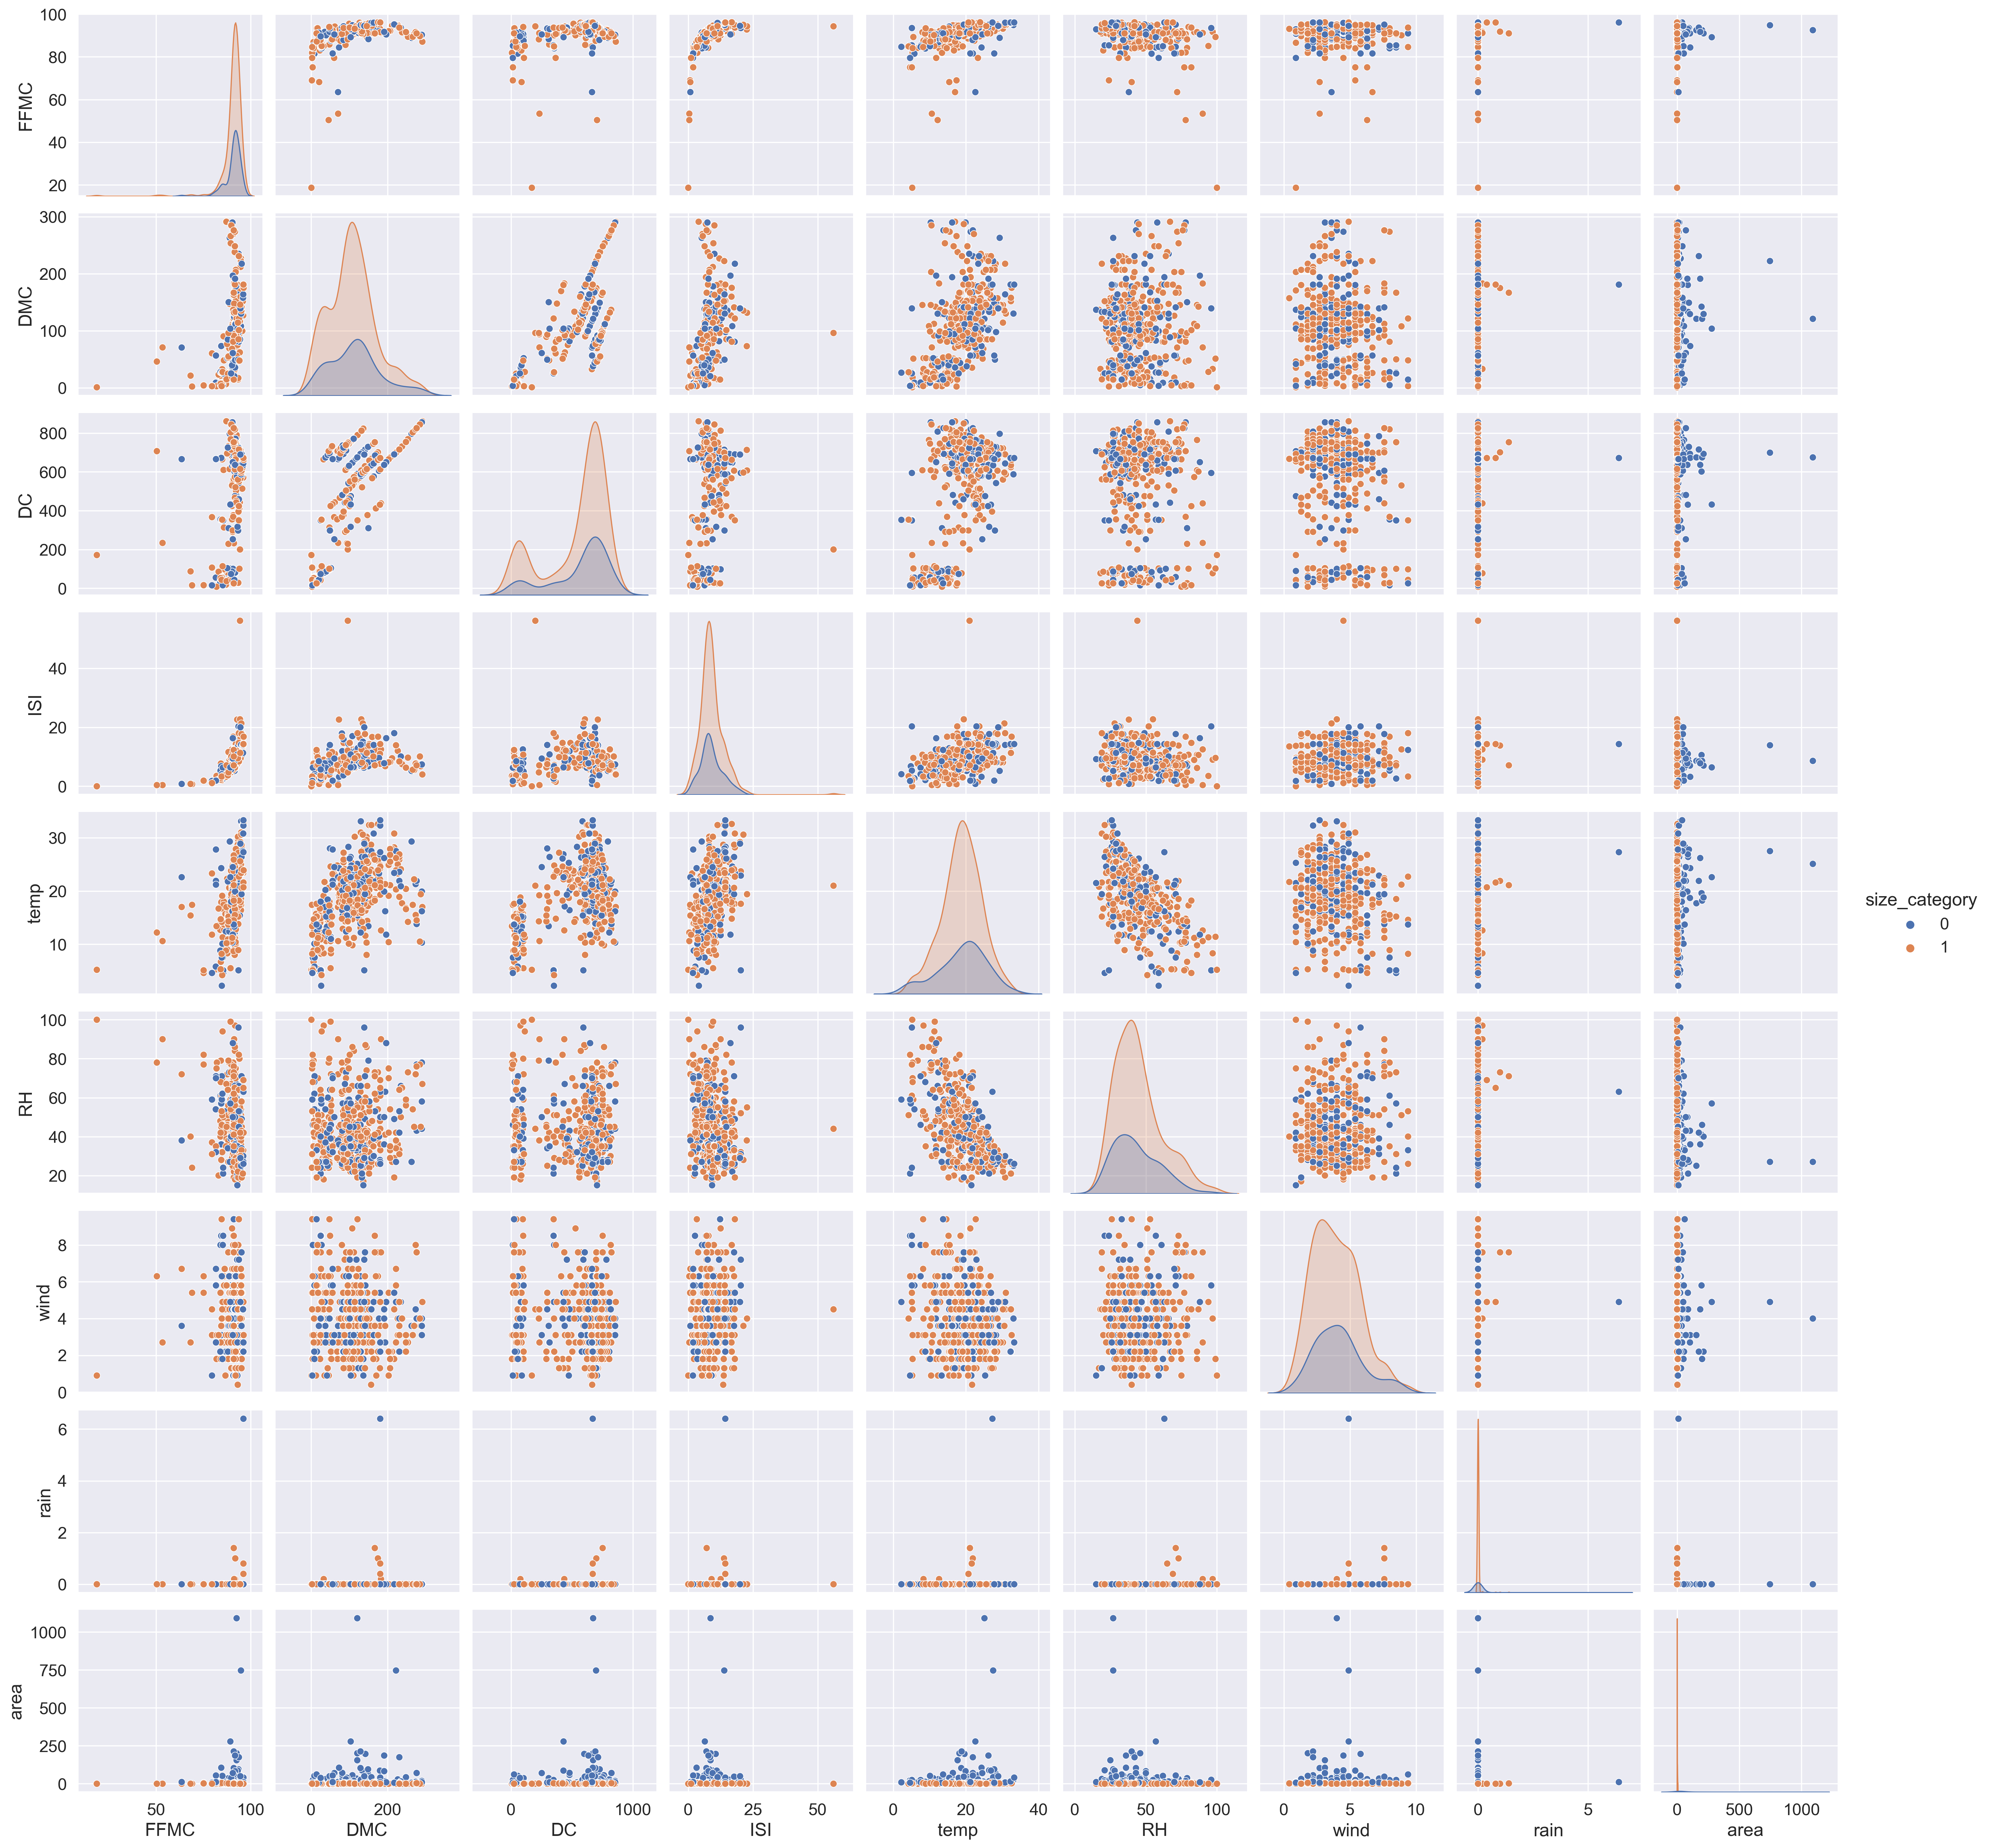

In [45]:
sns.pairplot(df, hue = 'size_category')

In [47]:
x = df.iloc[:,0:-1]
y = df['size_category']

In [48]:
sc = StandardScaler()

sc.fit_transform(x)

array([[-0.79603981, -1.31838569, -1.82893094, ...,  1.49437016,
        -0.06903477, -0.20279135],
       [-0.00325666, -1.1740525 ,  0.48925693, ..., -1.72936355,
        -0.06903477, -0.20279135],
       [-0.00325666, -1.04383887,  0.56104493, ..., -1.50703709,
        -0.06903477, -0.20279135],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ...,  1.49437016,
        -0.06903477, -0.02860775],
       [ 0.68141971,  0.56108339,  0.26985988, ..., -0.00633347,
        -0.06903477, -0.20279135],
       [-2.00323234, -1.68235633, -1.77892132, ...,  0.27157461,
        -0.06903477, -0.20279135]])

In [49]:
# Model building

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2,random_state = 1)

- kernel = rbf

In [51]:
svc = SVC(kernel = 'rbf')

svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)

print(classification_report(ytest, ypred))

print('Training Accuracy = ', svc.score(xtrain,  ytrain))
print('Testing Accuracy = ', svc.score(xtest,ytest))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        25
           1       0.77      1.00      0.87        77

    accuracy                           0.77       102
   macro avg       0.89      0.54      0.51       102
weighted avg       0.83      0.77      0.69       102

Training Accuracy =  0.7542997542997543
Testing Accuracy =  0.7745098039215687


In [52]:
cm = confusion_matrix(ytest, ypred)
cm

array([[ 2, 23],
       [ 0, 77]], dtype=int64)

- kernel = poly

In [53]:
svc1 = SVC(kernel = 'poly')

svc1.fit(xtrain, ytrain)
ypred1 = svc1.predict(xtest)

print(classification_report(ytest, ypred1))

print('Training Accuracy = ', svc1.score(xtrain, ytrain))
print('Testing Accuracy = ', svc1.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.80      1.00      0.89        77

    accuracy                           0.81       102
   macro avg       0.90      0.62      0.64       102
weighted avg       0.85      0.81      0.77       102

Training Accuracy =  0.7862407862407862
Testing Accuracy =  0.8137254901960784


In [54]:
confusion_matrix(ytest, ypred1)

array([[ 6, 19],
       [ 0, 77]], dtype=int64)

- kernel = linear

In [55]:
svc2 = SVC(kernel = 'linear')

svc2.fit(xtrain, ytrain)
ypred2 = svc2.predict(xtest)

print(classification_report(ytest, ypred2))

print('Training Accuracy = ', svc2.score(xtrain, ytrain))
print('Testing Accuracy = ', svc2.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.99      1.00      0.99        77

    accuracy                           0.99       102
   macro avg       0.99      0.98      0.99       102
weighted avg       0.99      0.99      0.99       102

Training Accuracy =  1.0
Testing Accuracy =  0.9901960784313726


In [56]:
confusion_matrix(ytest, ypred2)

array([[24,  1],
       [ 0, 77]], dtype=int64)

In [57]:
# Hyperparameter tuning

- Using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
svc3 = SVC()

params = {
    'C'     : [0.0001,0.001,0.01,0.1,1,10,100],
    'kernel': ['linear','rbf','poly'],
    'gamma' : [0.1,0.001,1,10]
}

In [60]:
grid = GridSearchCV(estimator = SVC(), param_grid = params)
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 0.001, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [61]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [62]:
#  Model building using best parameters obtained from GridSearchCV

In [63]:
svc4 = SVC(C = 0.01, kernel = 'linear', gamma = 0.1)
svc4.fit(xtrain, ytrain)

ypred4 = svc4.predict(xtest)

print(classification_report(ytest, ypred4))

print('Training Accuracy = ', svc4.score(xtrain,  ytrain))
print('Testing Accuracy = ', svc4.score(xtest,ytest))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.99      1.00      0.99        77

    accuracy                           0.99       102
   macro avg       0.99      0.98      0.99       102
weighted avg       0.99      0.99      0.99       102

Training Accuracy =  0.9877149877149877
Testing Accuracy =  0.9901960784313726


In [64]:
confusion_matrix(ytest, ypred4)

array([[24,  1],
       [ 0, 77]], dtype=int64)

In [69]:
Accuracy = accuracy_score(ytest, ypred4)
print('Accuracy = ', Accuracy)

Precision = precision_score(ytest, ypred4)
print('Precision = ', Precision)

Recall = recall_score(ytest, ypred4)
print('Recall = ', Recall)

F1_Score = f1_score(ytest, ypred4)
print('F1_Score = ', F1_Score)

Accuracy =  0.9901960784313726
Precision =  0.9871794871794872
Recall =  1.0
F1_Score =  0.9935483870967742


- Using RandomizeSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
svc5 = SVC()

params = {
    'C'     : [0.0001,0.001,0.01,0.1,1,10,100],
    'kernel': ['linear','rbf','poly'],
    'gamma' : [0.1,0.001,1,10]
}

In [73]:
RSCV = RandomizedSearchCV(estimator = SVC(), param_distributions = params, cv = 10, verbose = 300)

RSCV.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=100, gamma=0.001, kernel=rbf............................
[CV 1/10; 1/10] END C=100, gamma=0.001, kernel=rbf;, score=0.805 total time=   0.0s
[CV 2/10; 1/10] START C=100, gamma=0.001, kernel=rbf............................
[CV 2/10; 1/10] END C=100, gamma=0.001, kernel=rbf;, score=0.854 total time=   0.0s
[CV 3/10; 1/10] START C=100, gamma=0.001, kernel=rbf............................
[CV 3/10; 1/10] END C=100, gamma=0.001, kernel=rbf;, score=0.854 total time=   0.0s
[CV 4/10; 1/10] START C=100, gamma=0.001, kernel=rbf............................
[CV 4/10; 1/10] END C=100, gamma=0.001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/10; 1/10] START C=100, gamma=0.001, kernel=rbf............................
[CV 5/10; 1/10] END C=100, gamma=0.001, kernel=rbf;, score=0.805 total time=   0.0s
[CV 6/10; 1/10] START C=100, gamma=0.001, kernel=rbf............................
[CV 6/10; 1/10] END C=100, gamm

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100],
                                        'gamma': [0.1, 0.001, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   verbose=300)

In [74]:
RSCV.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 100}

In [75]:
# Model building using best parameters obtained from RandomizedSearchCV

In [76]:
svc6 = SVC(C = 0.1, kernel = 'poly', gamma = 10)
svc6.fit(xtrain, ytrain)

ypred6 = svc6.predict(xtest)

print(classification_report(ytest, ypred6))

print('Training Accuracy = ', svc6.score(xtrain, ytrain))
print('Testing Accuracy = ', svc6.score(xtest, ytest))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.99      1.00      0.99        77

    accuracy                           0.99       102
   macro avg       0.99      0.98      0.99       102
weighted avg       0.99      0.99      0.99       102

Training Accuracy =  1.0
Testing Accuracy =  0.9901960784313726


In [77]:
confusion_matrix(ytest, ypred6)

array([[24,  1],
       [ 0, 77]], dtype=int64)

In [78]:
Accuracy = accuracy_score(ytest, ypred6)
print('Accuracy = ', Accuracy)

Precision = precision_score(ytest, ypred6)
print('Precision = ', Precision)

Recall = recall_score(ytest, ypred6)
print('Recall = ', Recall)

F1_Score = f1_score(ytest, ypred6)
print('F1_Score = ', F1_Score)

Accuracy =  0.9901960784313726
Precision =  0.9871794871794872
Recall =  1.0
F1_Score =  0.9935483870967742
